# WEATHER REPORT 

# ABOUT DATASET

-------------------------------------------

# DESCRIPTION

This dataset provides daily weather information for capital cities around the world. Unlike forecast data, this dataset offers a comprehensive set of features that reflect the current weather conditions around the world.


Starting from August 29, 2023.


It provides over 40+ features , including temperature, wind, pressure, precipitation, humidity, visibility, air quality measurements and more. The dataset is valuable for analyzing Global weather patterns, exploring climate trends, and understanding the relationships between different weather parameters.

------------------------------------------------

# KEY FEATURES


Country: Country of the weather data
    
location_name: Name of the location (city)
    
latitude: Latitude coordinate of the location
    
longitude: Longitude coordinate of the location
    
timezone: Timezone of the location
    
last_updated_epoch: Unix timestamp of the last data update
    
last_updated: Local time of the last data update
    
temperature_celsius: Temperature in degrees Celsius
    
temperature_fahrenheit: Temperature in degrees Fahrenheit
    
condition_text: Weather condition description
    
wind_mph: Wind speed in miles per hour
    
wind_kph: Wind speed in kilometers per hour
    
wind_degree: Wind direction in degrees
    
wind_direction: Wind direction as a 16-point compass
    
pressure_mb: Pressure in millibars
    
pressure_in: Pressure in inches
    
precip_mm: Precipitation amount in millimeters
    
precip_in: Precipitation amount in inches
    
humidity: Humidity as a percentage
    
cloud: Cloud cover as a percentage
    
feels_like_celsius: Feels-like temperature in Celsius
    
feels_like_fahrenheit: Feels-like temperature in Fahrenheit
    
visibility_km: Visibility in kilometers
    
visibility_miles: Visibility in miles
    
uv_index: UV Index
    
gust_mph: Wind gust in miles per hour
    
gust_kph: Wind gust in kilometers per hour
    
air_quality_Carbon_Monoxide: Air quality measurement: Carbon Monoxide
        
air_quality_Ozone: Air quality measurement: Ozone
        
air_quality_Nitrogen_dioxide: Air quality measurement: Nitrogen Dioxide
        
air_quality_Sulphur_dioxide: Air quality measurement: Sulphur Dioxide
        
air_quality_PM2.5: Air quality measurement: PM2.5
        
air_quality_PM10: Air quality measurement: PM10
        
air_quality_us-epa-index: Air quality measurement: US EPA Index
        
air_quality_gb-defra-index: Air quality measurement: GB DEFRA Index
        
sunrise: Local time of sunrise
    
sunset: Local time of sunset
    
moonrise: Local time of moonrise
    
moonset: Local time of moonset
    
moon_phase: Current moon phase
    
moon_illumination: Moon illumination percentage

In [1]:
#IMPORTING LIBRARIES

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
#READING THE DATASET

df = pd.read_csv(r"D:\DATA SCIENCE\DATASETS\WEATHER REPORT\GlobalWeatherRepository.csv")

In [3]:
#GETTING THE HEAD

df.head()

country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1693301400  2023-08-29 14:00                 28.8   
1          1693301400  2023-08-29 11:30                 27.0   
2          1693301400  2023-08-29 10:30                 28.0   
3          1693301400  2023-08-29 11:30                 10.2   
4          1693301400  2023-08-29 10:30                 25.0   

   temperature_fahrenheit condition_text  ...  air_quality_PM2.5  \
0                    83.8          Sunny  ...                7.9   
1                    80.6  Partly cloudy  ...               28.2   
2                    82.4  Partly cloudy  ...                6.4   
3                    50.4          Sunny  ...                0.5   
4                    77.0  Partly cloudy  ...              139.6   

   air_quality_PM10  air_quality_us-epa-index air_quality_gb-defra-index  \
0              11.1                         1                          1   
1              29.6                         2                          3   
2               7.9                         1                          1   
3               0.8                         1                          1   
4             203.3                         4                         10   

    sunrise    sunset  moonrise   moonset      moon_phase  moon_illumination  
0  05:24 AM  06:24 PM  05:39 PM  02:48 AM  Waxing Gibbous                 93  
1  06:04 AM  07:19 PM  06:50 PM  03:25 AM  Waxing Gibbous                 93  
2  06:16 AM  07:21 PM  06:46 PM  03:50 AM  Waxing Gibbous                 93  
3  07:16 AM  08:34 PM  08:08 PM  04:38 AM  Waxing Gibbous                 93  
4  06:11 AM  06:06 PM  04:43 PM  04:41 AM  Waxing Gibbous                 93  

[5 rows x 41 columns]

In [4]:
#CHECKING THE SHAPE OF THE DATASET

df.shape

(780, 41)

In [5]:
#DISPLAYING ALL COLUMNS AND ROWS

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [6]:
#GETTING THE DISCRIPTION OF THE DATAFRAME

df.describe().T

count          mean           std           min  \
latitude                      780.0  1.929728e+01     24.590227 -4.130000e+01   
longitude                     780.0  2.182610e+01     65.712248 -1.752000e+02   
last_updated_epoch            780.0  1.693408e+09  83692.256679  1.693301e+09   
temperature_celsius           780.0  2.267167e+01      6.791413  2.900000e+00   
temperature_fahrenheit        780.0  7.280872e+01     12.225101  3.720000e+01   
wind_mph                      780.0  6.888205e+00      4.540630  2.200000e+00   
wind_kph                      780.0  1.108551e+01      7.310074  3.600000e+00   
wind_degree                   780.0  1.722333e+02     98.241075  1.000000e+00   
pressure_mb                   780.0  1.012288e+03      5.892065  9.980000e+02   
pressure_in                   780.0  2.989172e+01      0.173377  2.947000e+01   
precip_mm                     780.0  3.392308e-01      1.619204  0.000000e+00   
precip_in                     780.0  1.312821e-02      0.063843  0.000000e+00   
humidity                      780.0  7.319359e+01     20.339410  6.000000e+00   
cloud                         780.0  3.909615e+01     32.712342  0.000000e+00   
feels_like_celsius            780.0  2.450923e+01      9.044389  8.000000e-01   
feels_like_fahrenheit         780.0  7.611282e+01     16.281867  3.340000e+01   
visibility_km                 780.0  9.827564e+00      2.450380  0.000000e+00   
visibility_miles              780.0  5.832051e+00      1.510340  0.000000e+00   
uv_index                      780.0  2.858974e+00      2.601591  1.000000e+00   
gust_mph                      780.0  1.071577e+01      7.126235  4.000000e-01   
gust_kph                      780.0  1.724628e+01     11.470302  7.000000e-01   
air_quality_Carbon_Monoxide   780.0  4.540540e+02    821.161879  1.235000e+02   
air_quality_Ozone             780.0  4.281321e+01     36.290259  0.000000e+00   
air_quality_Nitrogen_dioxide  780.0  9.233974e+00     18.117526  0.000000e+00   
air_quality_Sulphur_dioxide   780.0  6.191538e+00     14.789406  0.000000e+00   
air_quality_PM2.5             780.0  1.724192e+01     45.789973  5.000000e-01   
air_quality_PM10              780.0  2.799756e+01     61.580476  5.000000e-01   
air_quality_us-epa-index      780.0  1.393590e+00      0.838857  1.000000e+00   
air_quality_gb-defra-index    780.0  1.901282e+00      2.042991  1.000000e+00   
moon_illumination             780.0  9.725000e+01      2.587679  9.300000e+01   

                                       25%           50%           75%  \
latitude                      3.750000e+00  1.725000e+01  4.133000e+01   
longitude                    -6.840000e+00  2.324000e+01  5.058000e+01   
last_updated_epoch            1.693348e+09  1.693402e+09  1.693460e+09   
temperature_celsius           1.765000e+01  2.400000e+01  2.800000e+01   
temperature_fahrenheit        6.380000e+01  7.520000e+01  8.240000e+01   
wind_mph                      3.800000e+00  5.600000e+00  9.400000e+00   
wind_kph                      6.100000e+00  9.000000e+00  1.510000e+01   
wind_degree                   9.000000e+01  1.755000e+02  2.492500e+02   
pressure_mb                   1.008000e+03  1.012000e+03  1.015000e+03   
pressure_in                   2.977000e+01  2.988000e+01  2.997000e+01   
precip_mm                     0.000000e+00  0.000000e+00  1.000000e-01   
precip_in                     0.000000e+00  0.000000e+00  0.000000e+00   
humidity                      6.175000e+01  7.900000e+01  8.900000e+01   
cloud                         2.000000e+00  2.500000e+01  7.500000e+01   
feels_like_celsius            1.765000e+01  2.540000e+01  3.052500e+01   
feels_like_fahrenheit         6.380000e+01  7.770000e+01  8.695000e+01   
visibility_km                 1.000000e+01  1.000000e+01  1.000000e+01   
visibility_miles              6.000000e+00  6.000000e+00  6.000000e+00   
uv_index                      1.000000e+00  1.000000e+00  6.000000e+00   
gust_mph                      5.600000

In [7]:
#GETTING THE INFO. OF THE DATASET

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       780 non-null    object 
 1   location_name                 780 non-null    object 
 2   latitude                      780 non-null    float64
 3   longitude                     780 non-null    float64
 4   timezone                      780 non-null    object 
 5   last_updated_epoch            780 non-null    int64  
 6   last_updated                  780 non-null    object 
 7   temperature_celsius           780 non-null    float64
 8   temperature_fahrenheit        780 non-null    float64
 9   condition_text                780 non-null    object 
 10  wind_mph                      780 non-null    float64
 11  wind_kph                      780 non-null    float64
 12  wind_degree                   780 non-null    int64  
 13  wind_

In [8]:
#CHECKING THE NULL VALUES IN ALL THE COLUMNS

df.isnull().sum()

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

In [9]:
#FINDING THE SUM OF OVERALL NULL VALUES

df.isnull().sum().sum()

0

<Axes: >

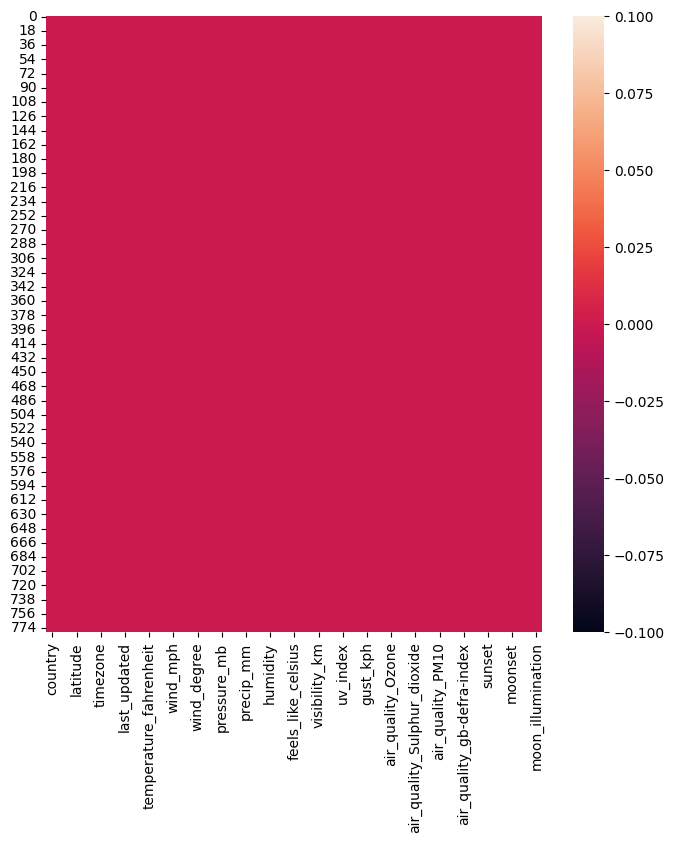

In [10]:
#VISUALISING THE DATAFRAME
#USING HEATMAP

plt.figure(figsize=(8,8))
sns.heatmap(df.isnull())

<Axes: >

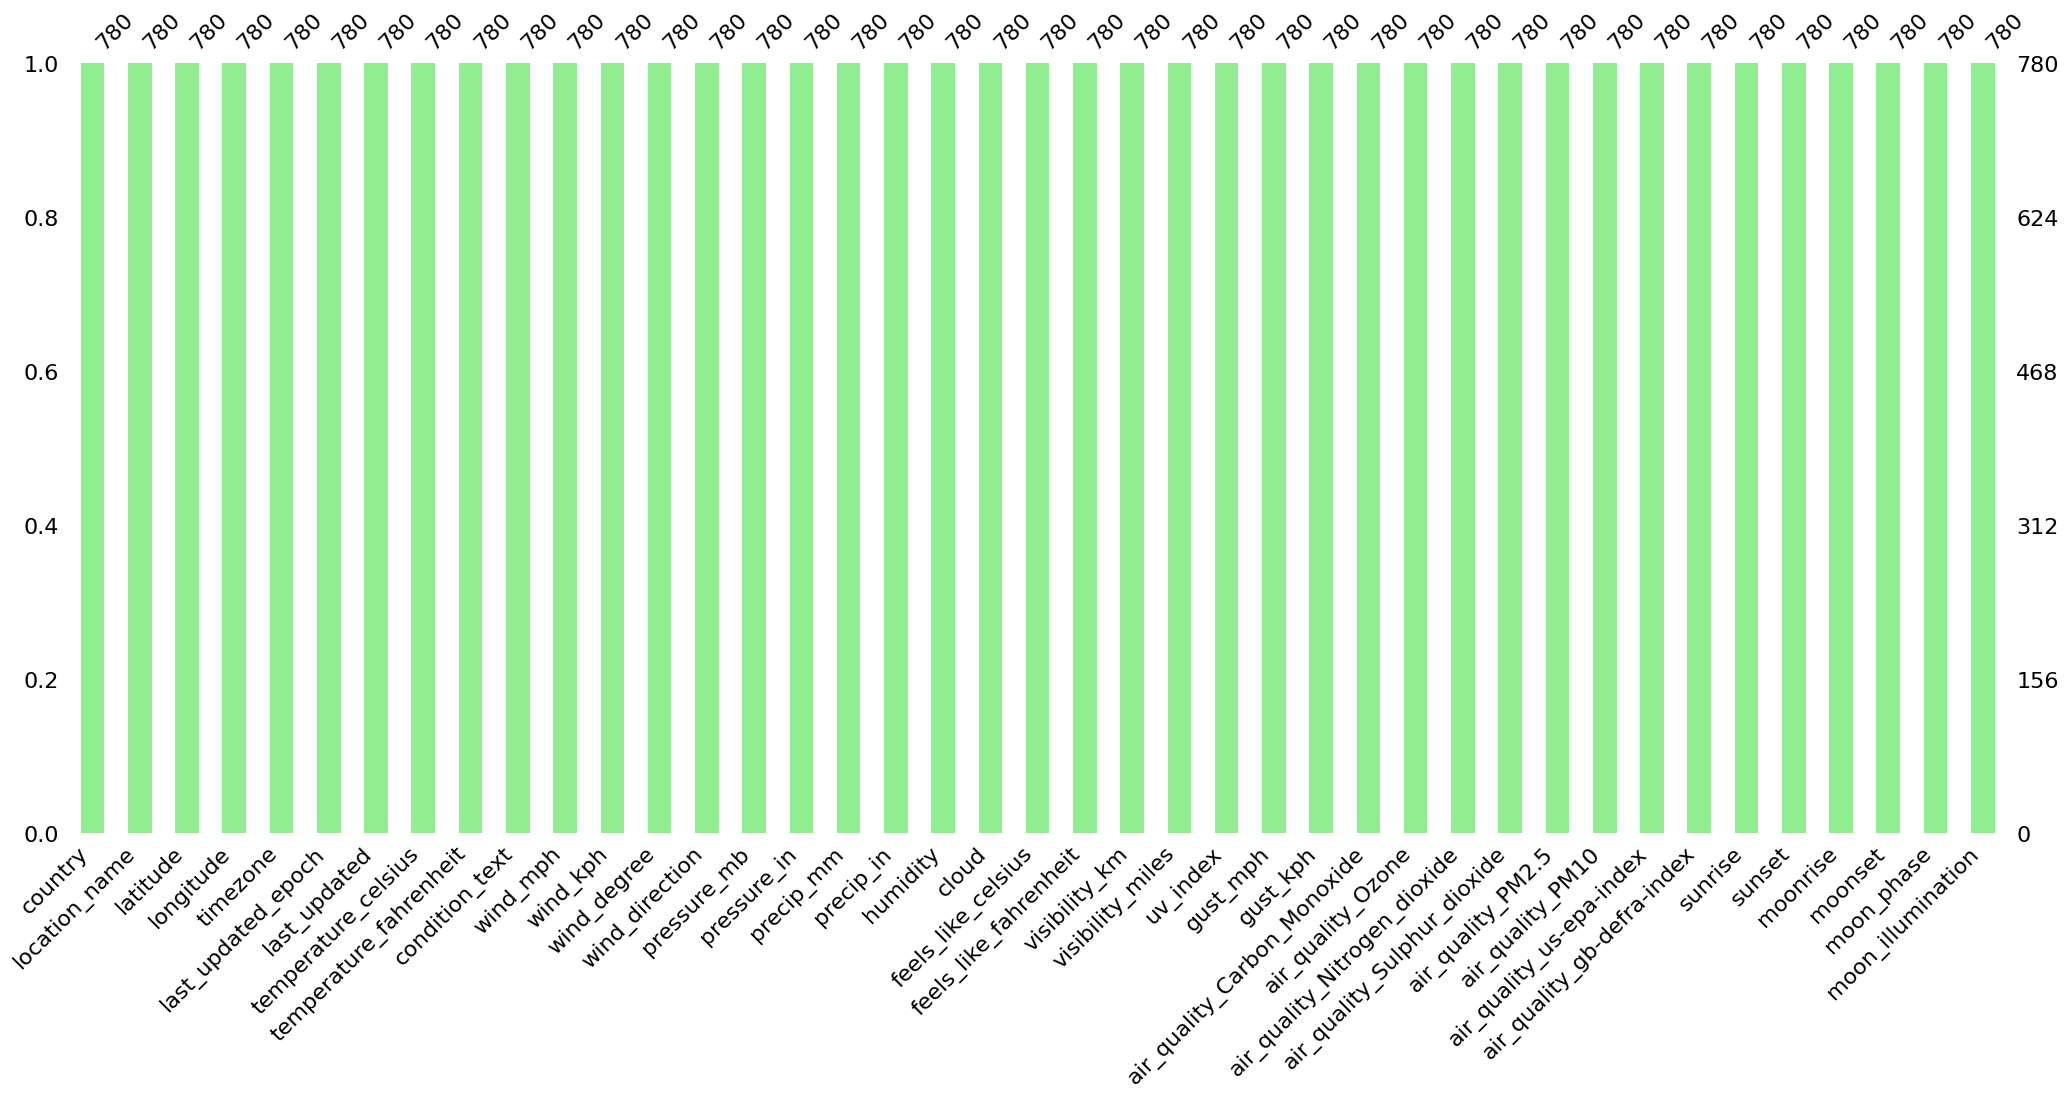

In [11]:
#THIS BARCHART WOULD GIVE US AN IDEA ABOUT HOW MANY MISSING VALUES ARE PRESENT IN EACH COLUMN

msno.bar(df,color='LightGreen')

THERE ARE NO MISSING VALUE PRESENT IN THE DATASET.

In [12]:
##CHECKING THE NUMERICAL FEAUTURES

num_var = df.select_dtypes(include=["int64","float64"]).columns

print("All the numerical features in the dataset : ",num_var)

All the numerical features in the dataset :  Index(['latitude', 'longitude', 'last_updated_epoch', 'temperature_celsius',
       'temperature_fahrenheit', 'wind_mph', 'wind_kph', 'wind_degree',
       'pressure_mb', 'pressure_in', 'precip_mm', 'precip_in', 'humidity',
       'cloud', 'feels_like_celsius', 'feels_like_fahrenheit', 'visibility_km',
       'visibility_miles', 'uv_index', 'gust_mph', 'gust_kph',
       'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
       'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
       'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index',
       'air_quality_gb-defra-index', 'moon_illumination'],
      dtype='object')


# CHECKING OUTLIERS

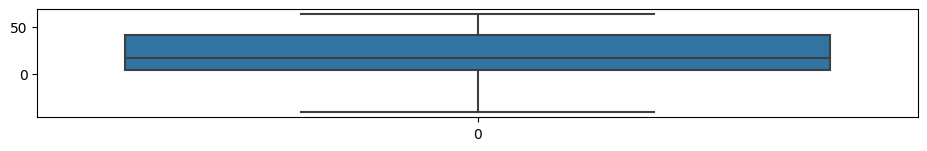

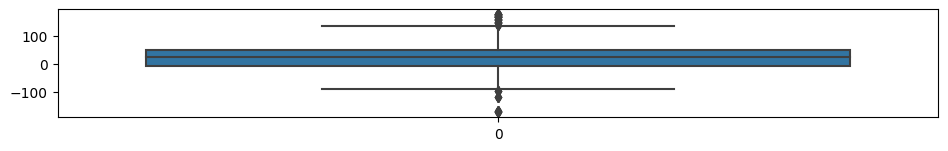

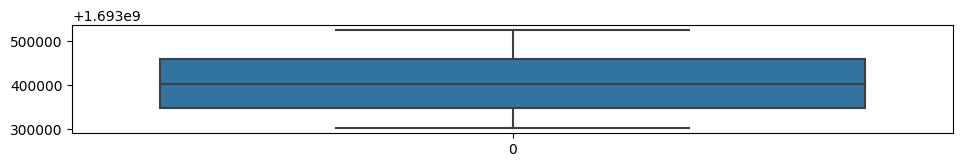

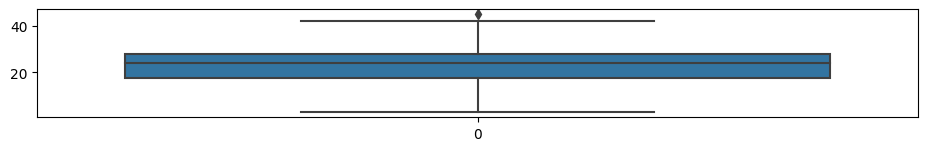

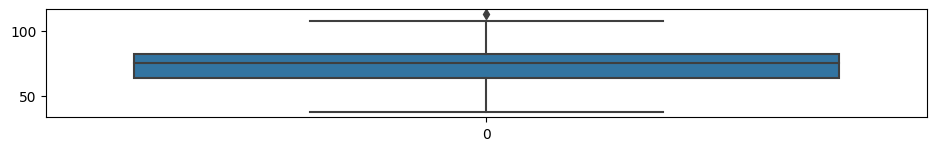

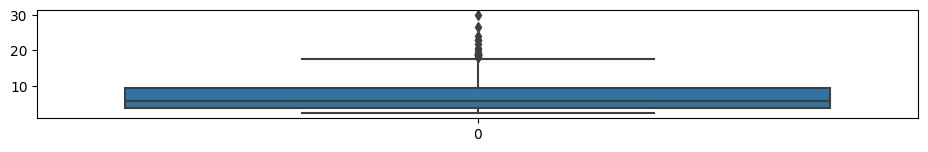

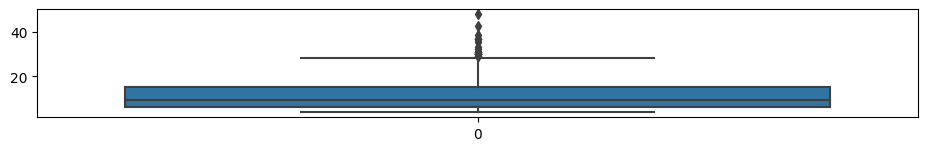

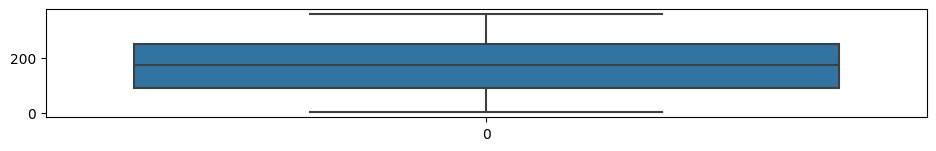

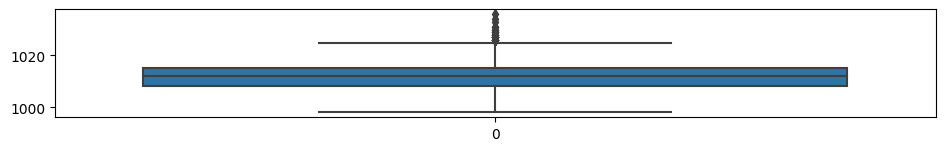

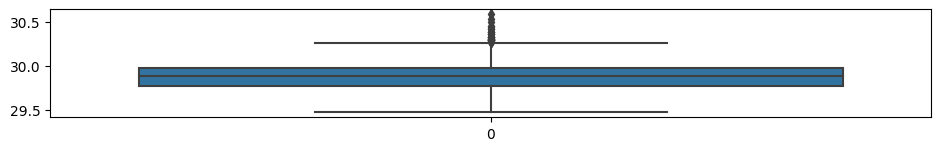

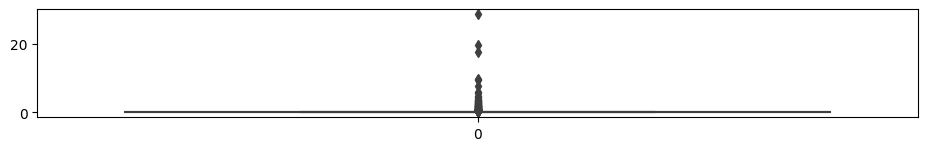

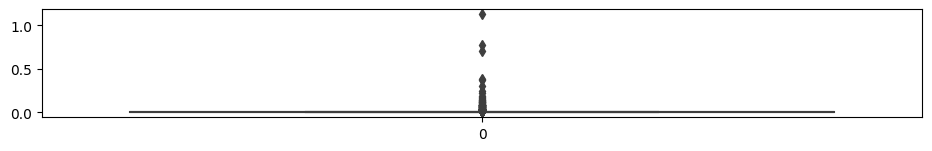

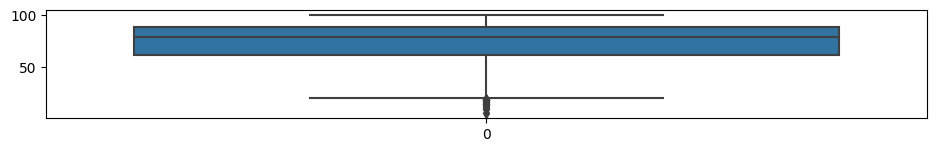

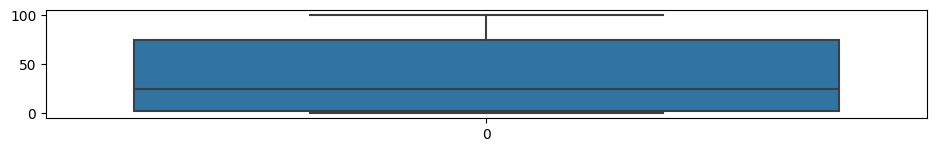

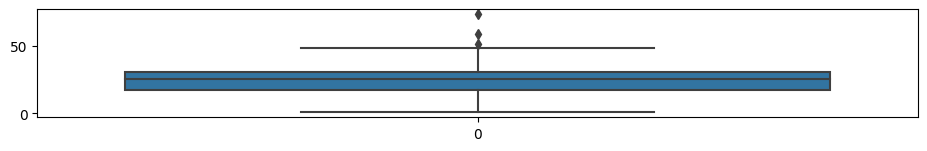

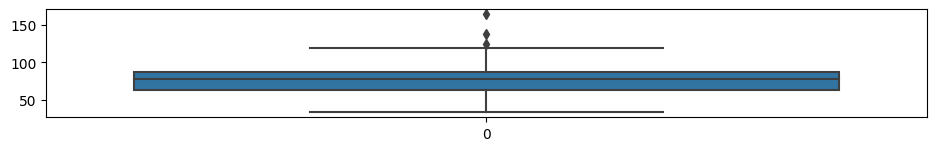

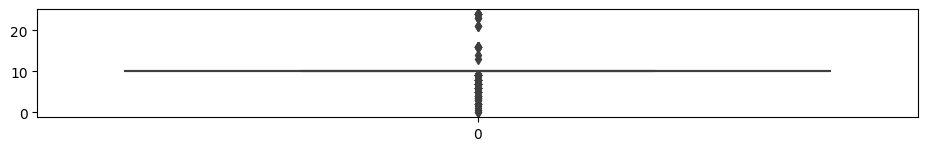

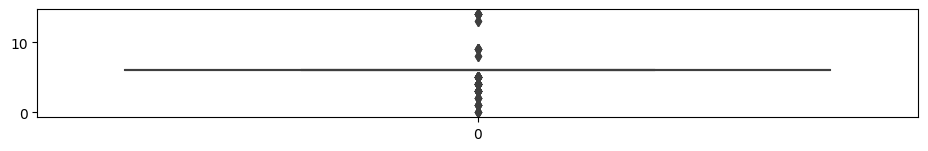

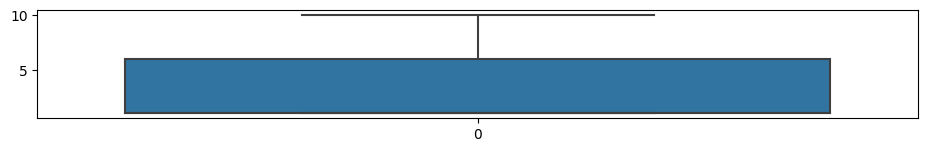

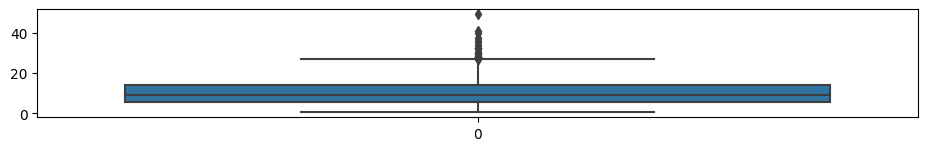

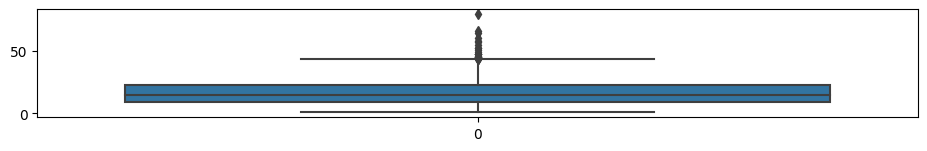

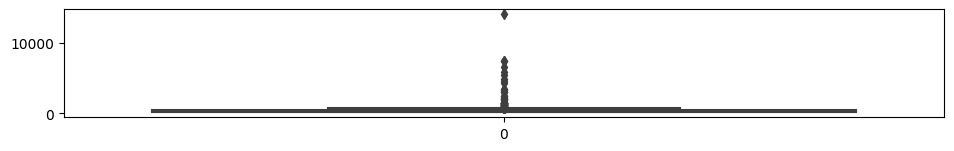

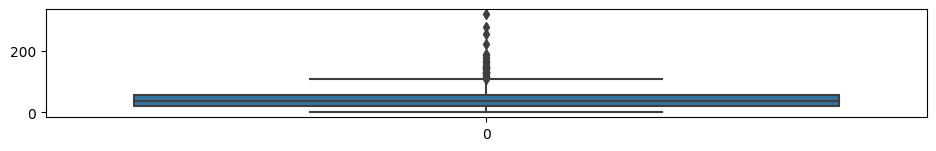

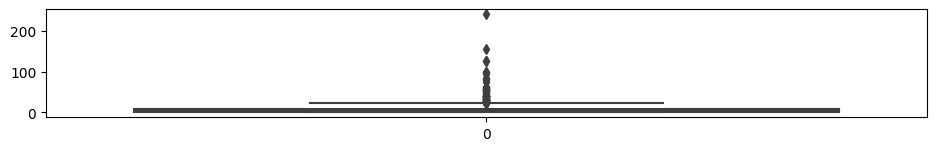

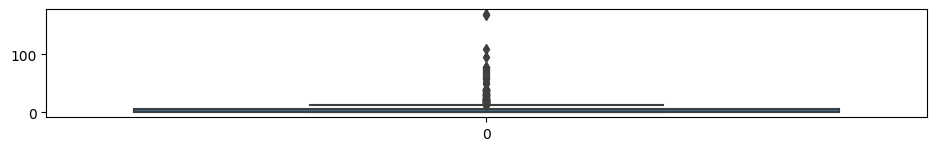

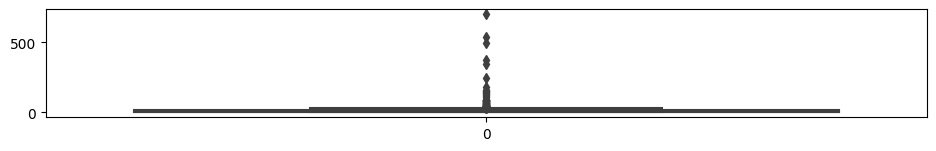

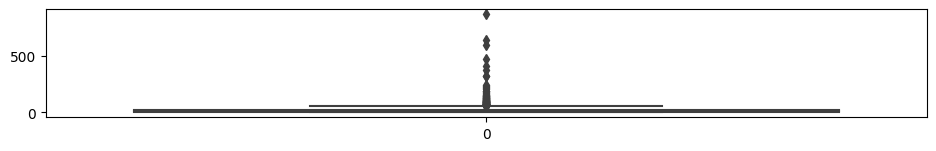

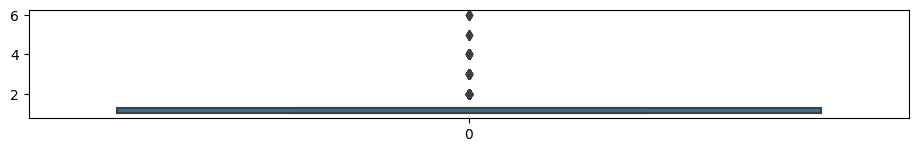

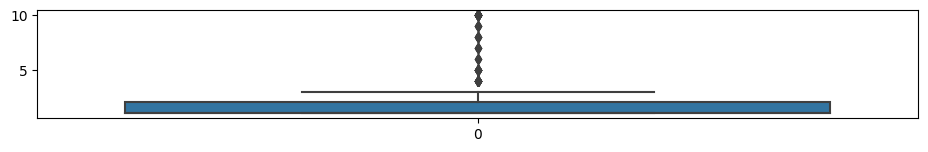

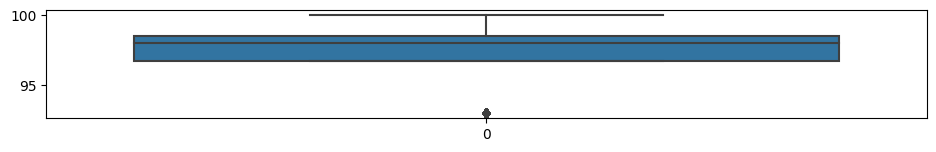

In [13]:
#USING BOXPLOT FOR GETTING THE OUTLIERS
num_var = ['latitude', 'longitude', 'last_updated_epoch', 'temperature_celsius',
       'temperature_fahrenheit', 'wind_mph', 'wind_kph', 'wind_degree',
       'pressure_mb', 'pressure_in', 'precip_mm', 'precip_in', 'humidity',
       'cloud', 'feels_like_celsius', 'feels_like_fahrenheit', 'visibility_km',
       'visibility_miles', 'uv_index', 'gust_mph', 'gust_kph',
       'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
       'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
       'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index',
       'air_quality_gb-defra-index', 'moon_illumination']


for i,var in enumerate(num_var):
    plt.figure(figsize=(25,25))
    plt.subplot(15,2,i+1)
    sns.boxplot(df[var])
    plt.show()

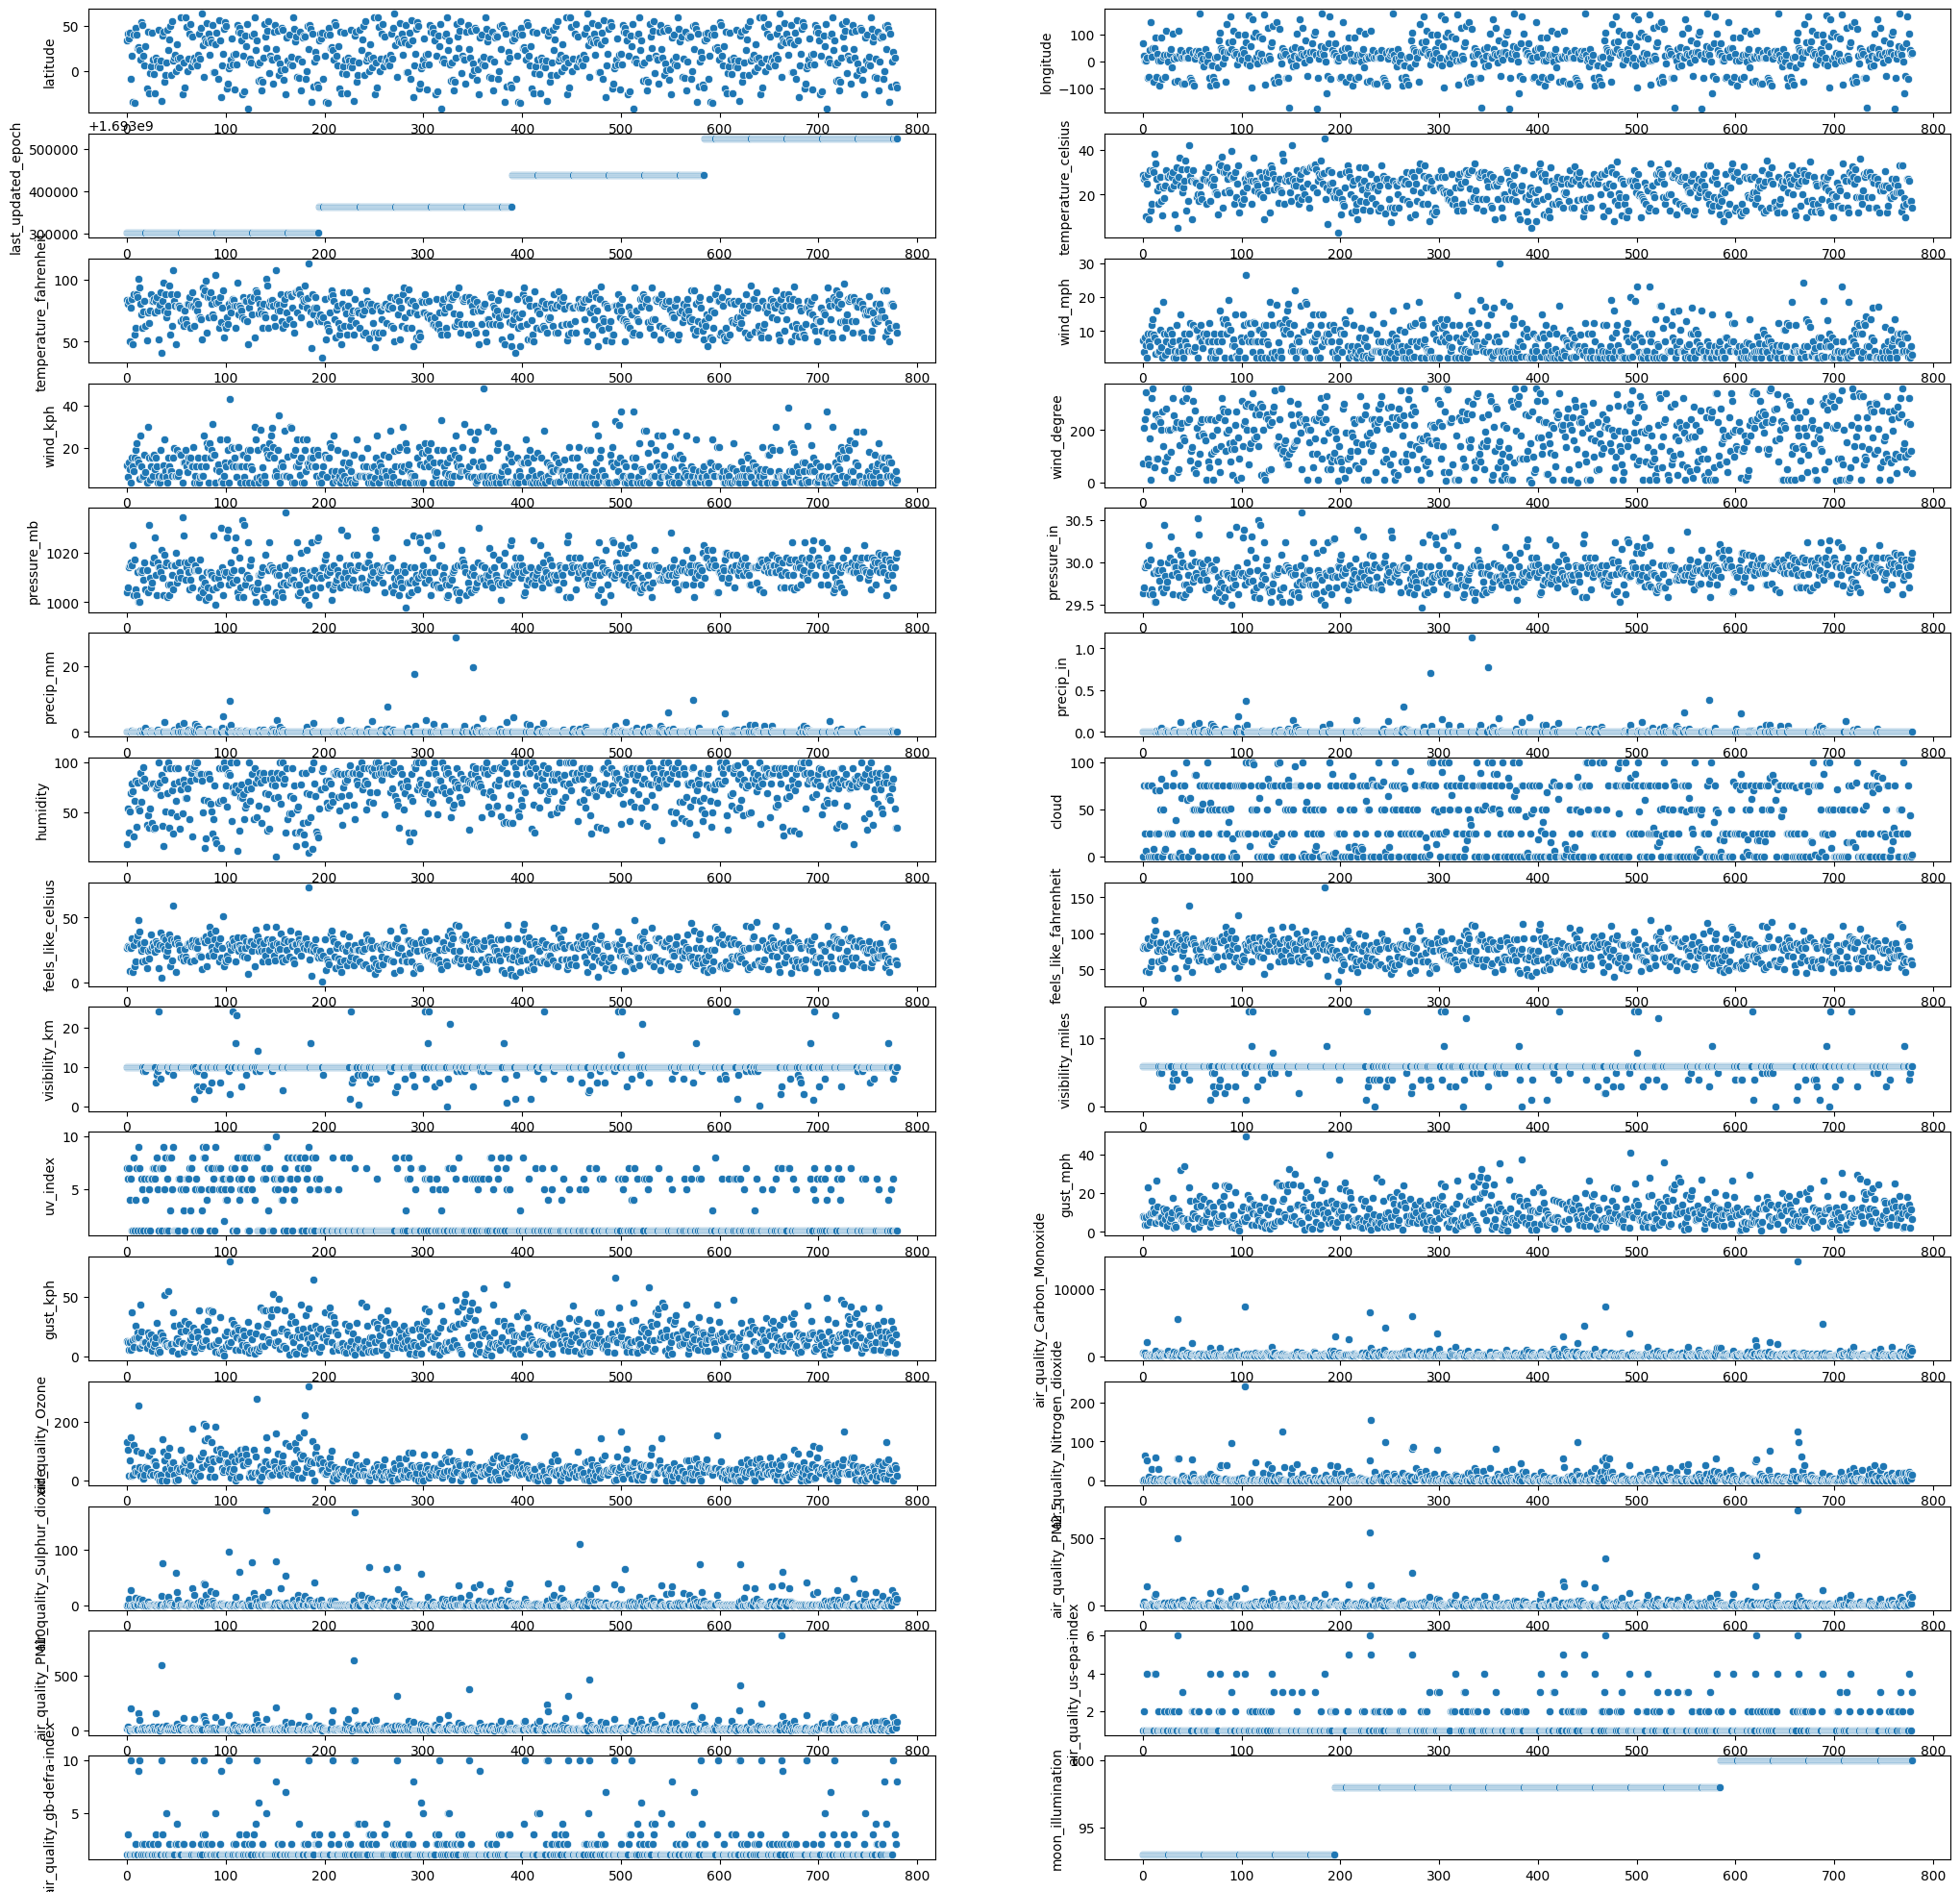

In [14]:
##PLOTTING SCATTER PLOT TO CHECK OUTLIERS IN THE DATAFRAME

plt.figure(figsize=(25,25))
for i , var in enumerate(num_var):
    plt.subplot(15,2,i+1)
    sns.scatterplot(df[var])
    plt.show

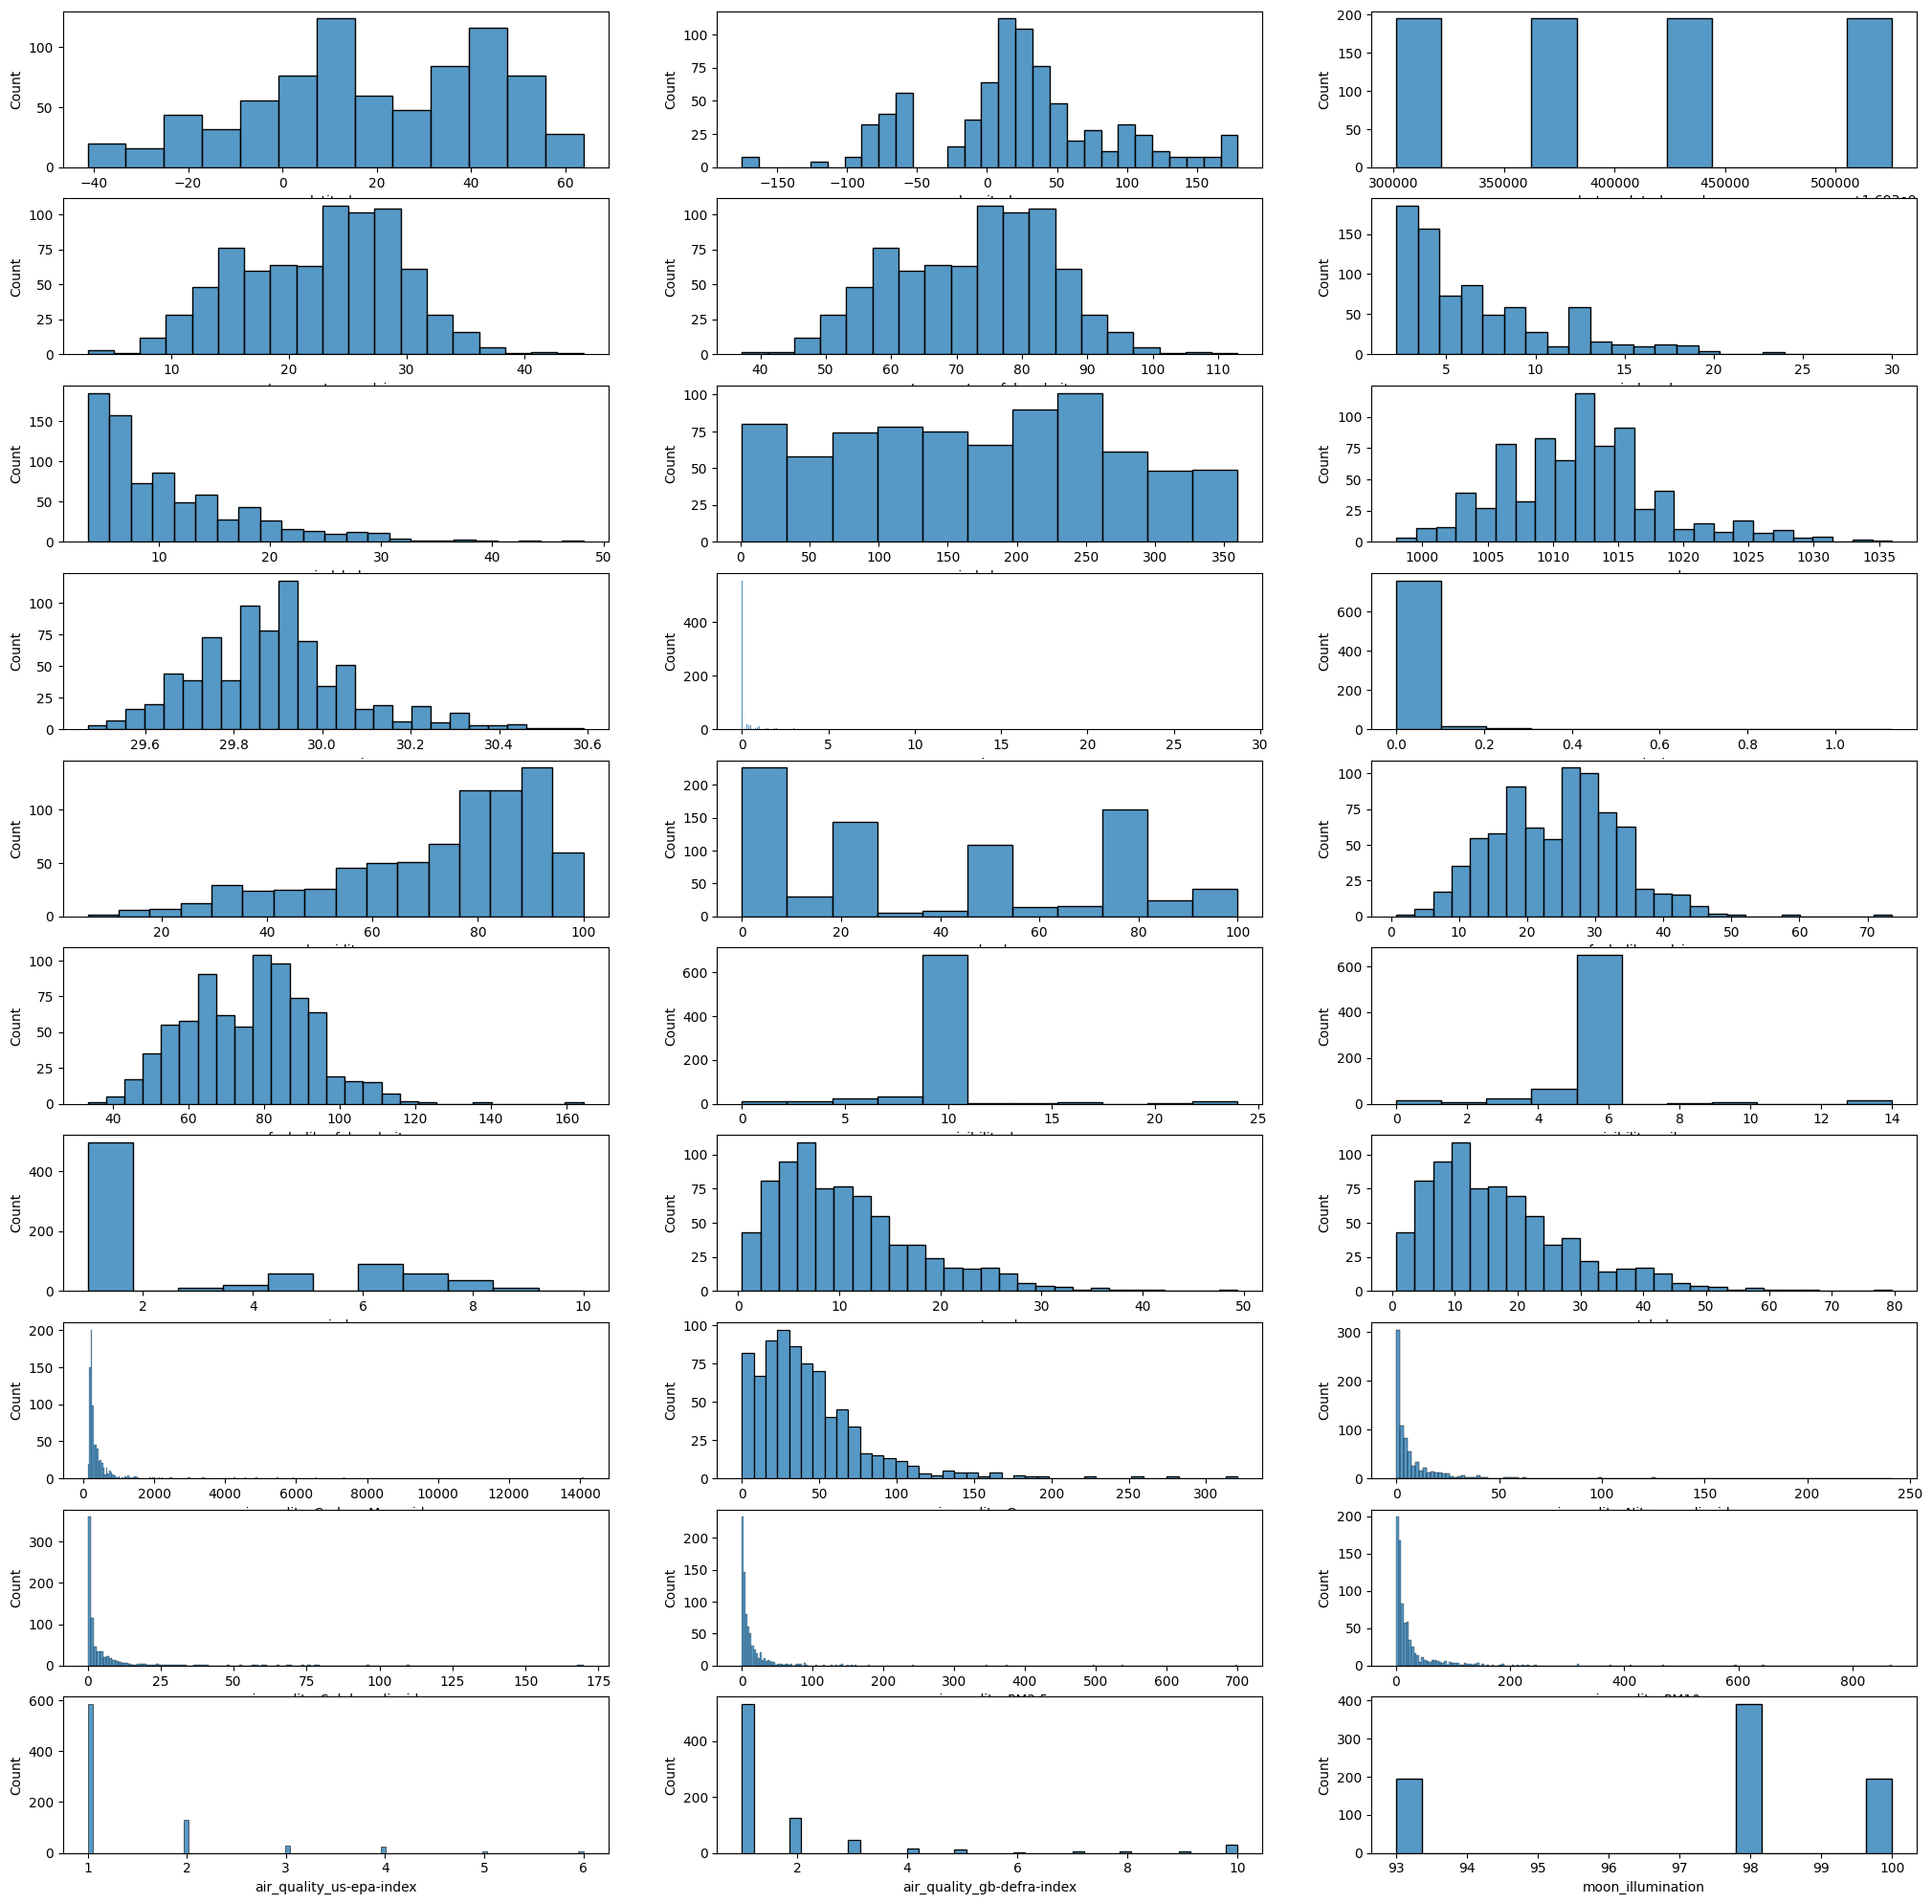

In [15]:
#PLOTTING HISTOGRAM TO CHECK OUTLIERS IN THE DATAFRAME

plt.figure(figsize=(25,25))
for i , var in enumerate(num_var):
    plt.subplot(10,3,i+1)
    sns.histplot(df[var])
    plt.show

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3816\2250737215.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],fit = norm)


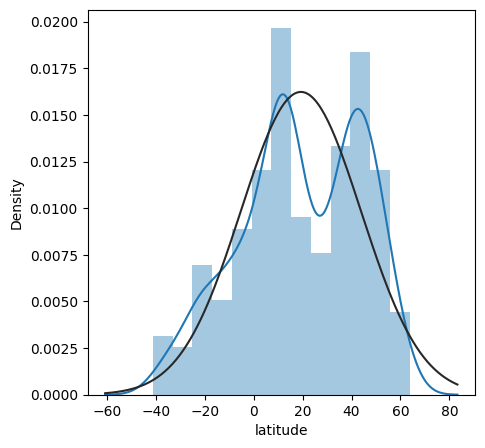

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3816\2250737215.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],fit = norm)


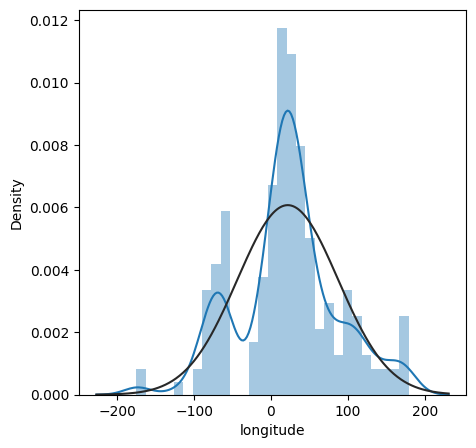

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3816\2250737215.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],fit = norm)


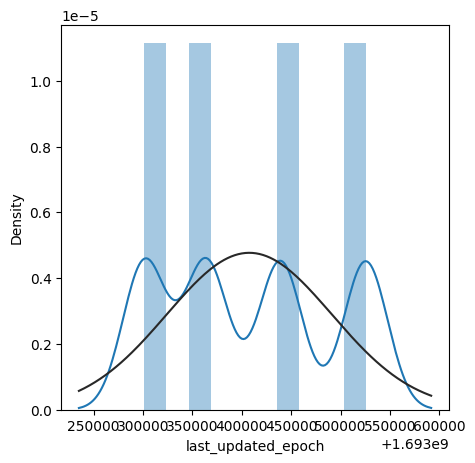

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3816\2250737215.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],fit = norm)


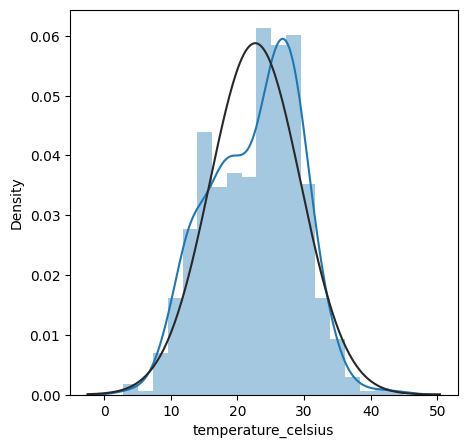

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3816\2250737215.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],fit = norm)


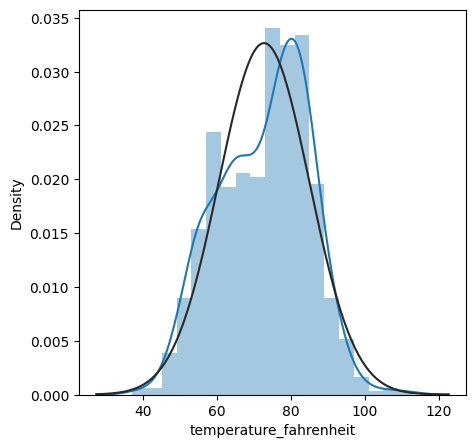

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3816\2250737215.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],fit = norm)


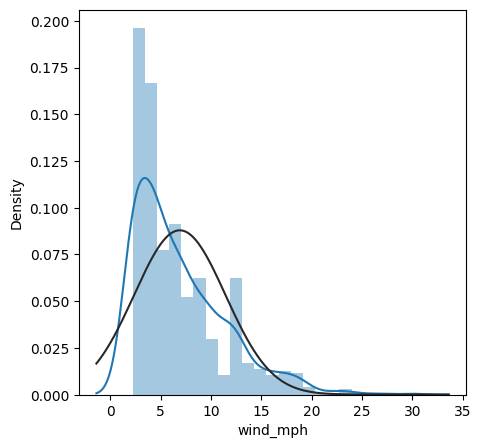

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3816\2250737215.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],fit = norm)


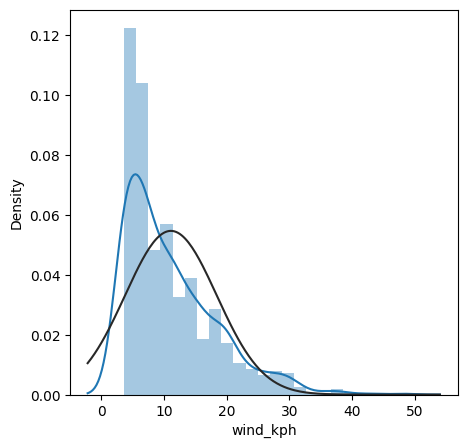

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3816\2250737215.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],fit = norm)


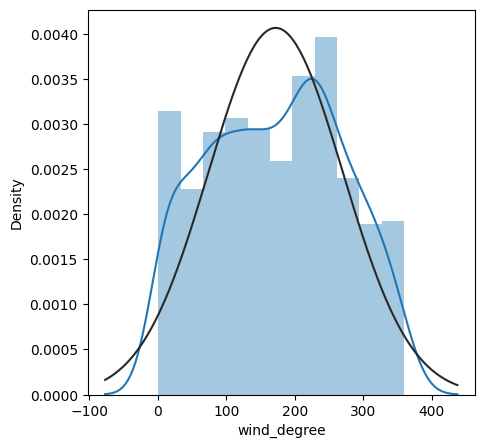

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3816\2250737215.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],fit = norm)


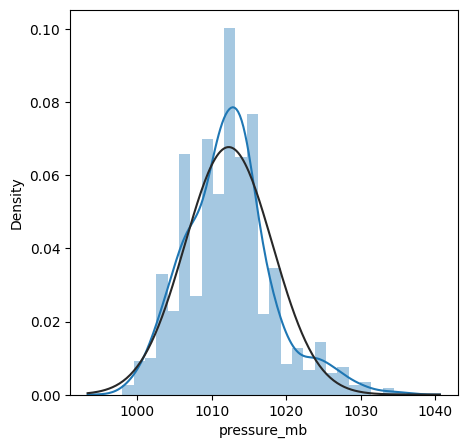

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3816\2250737215.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],fit = norm)


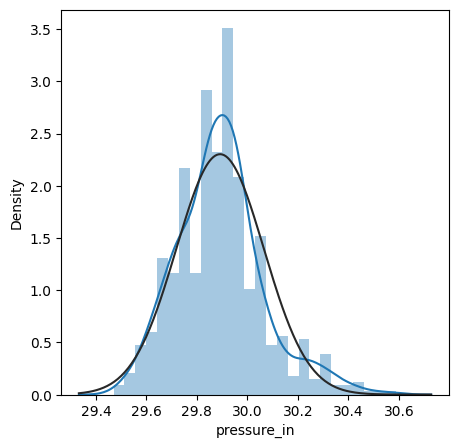

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3816\2250737215.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],fit = norm)


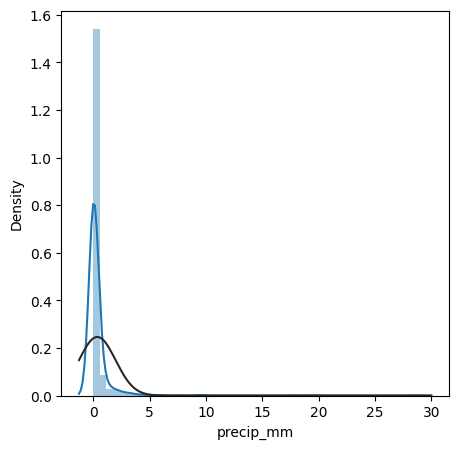

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3816\2250737215.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],fit = norm)


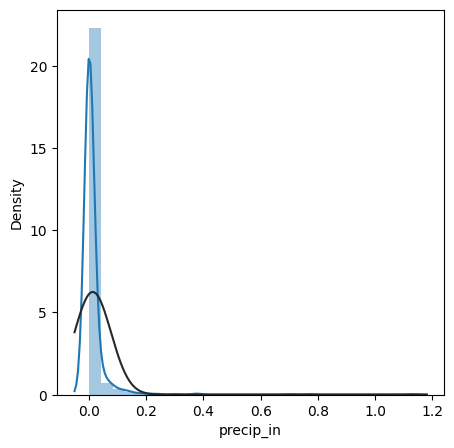

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3816\2250737215.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],fit = norm)


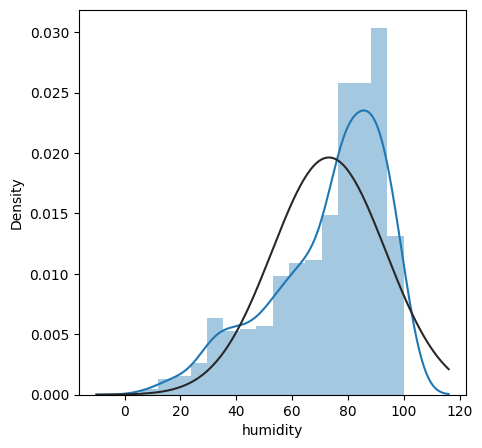

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3816\2250737215.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],fit = norm)


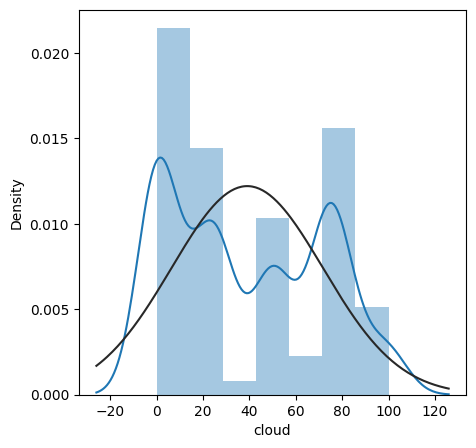

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3816\2250737215.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],fit = norm)


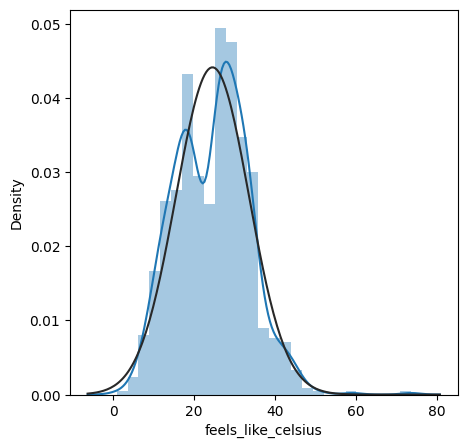

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3816\2250737215.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],fit = norm)


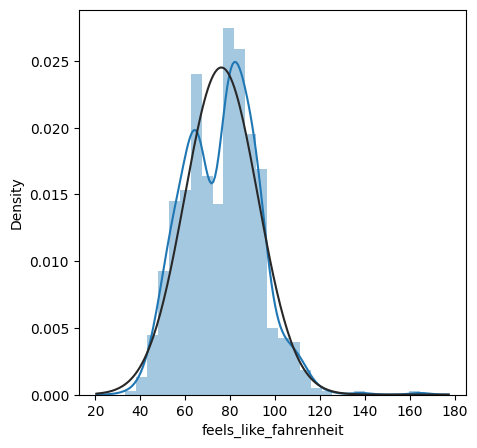

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3816\2250737215.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],fit = norm)


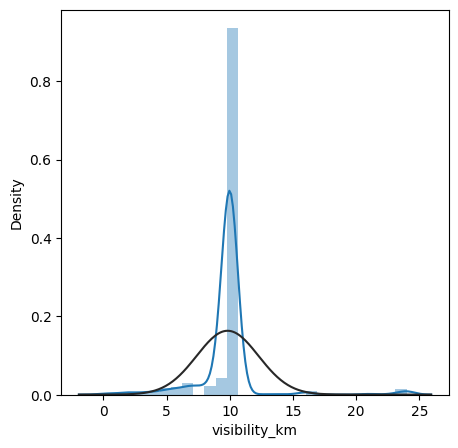

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3816\2250737215.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],fit = norm)


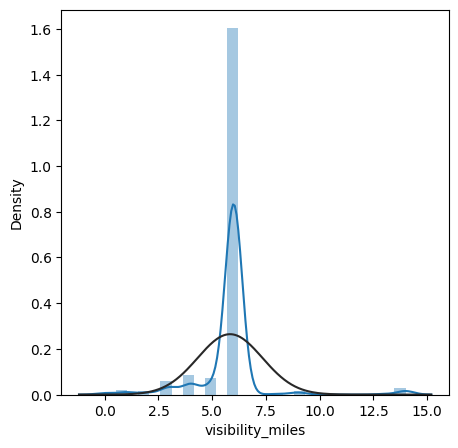

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3816\2250737215.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],fit = norm)


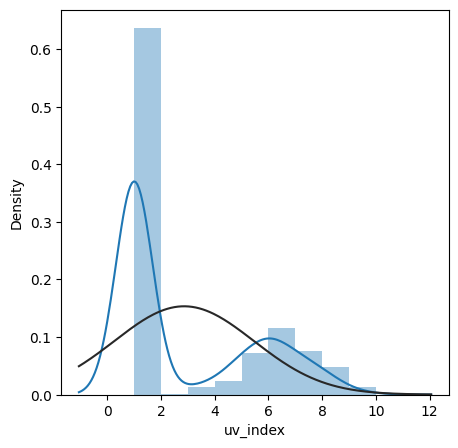

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3816\2250737215.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],fit = norm)


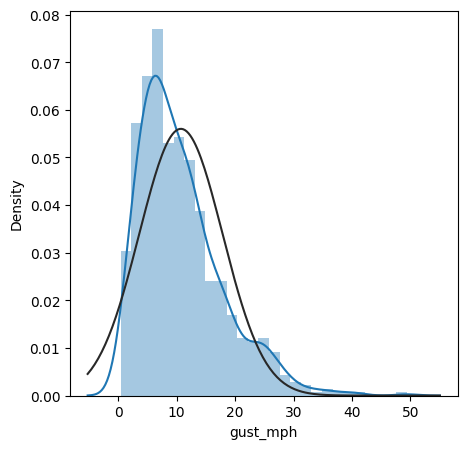

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3816\2250737215.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],fit = norm)


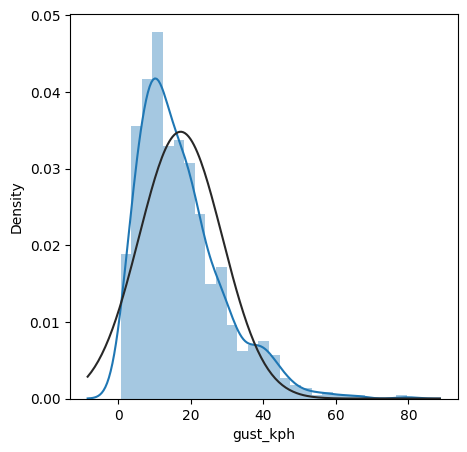

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3816\2250737215.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],fit = norm)


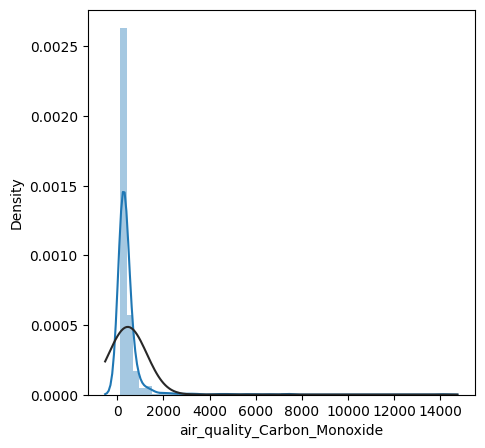

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3816\2250737215.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],fit = norm)


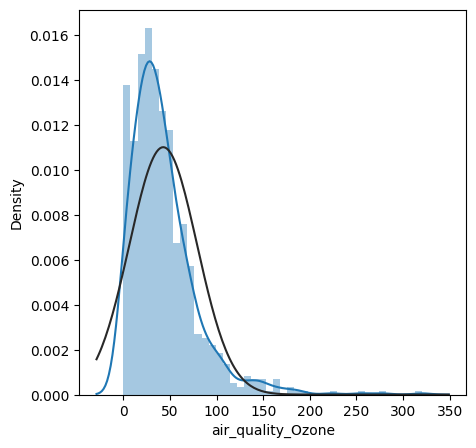

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3816\2250737215.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],fit = norm)


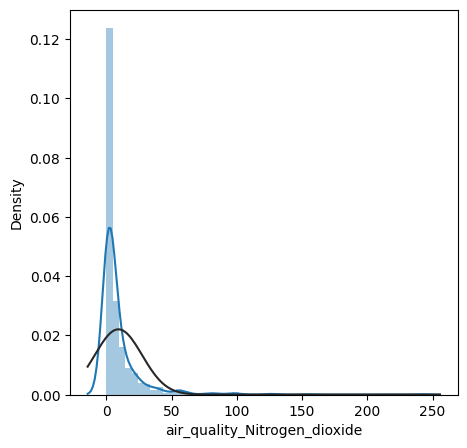

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3816\2250737215.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],fit = norm)


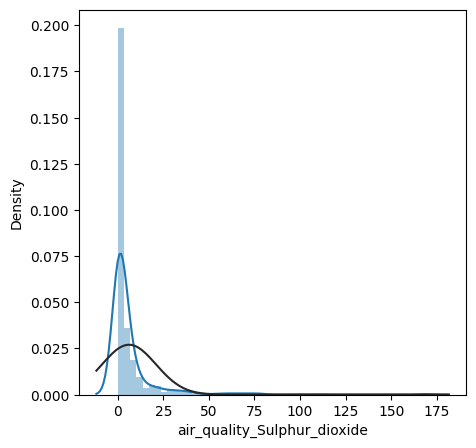

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3816\2250737215.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],fit = norm)


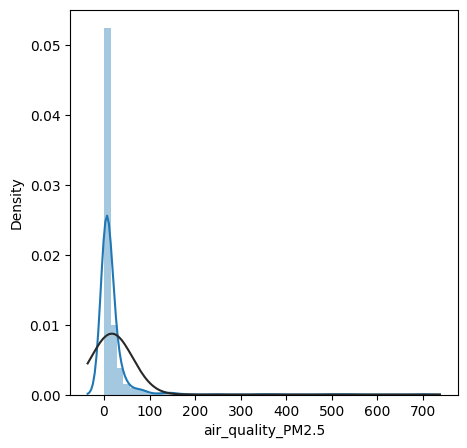

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3816\2250737215.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],fit = norm)


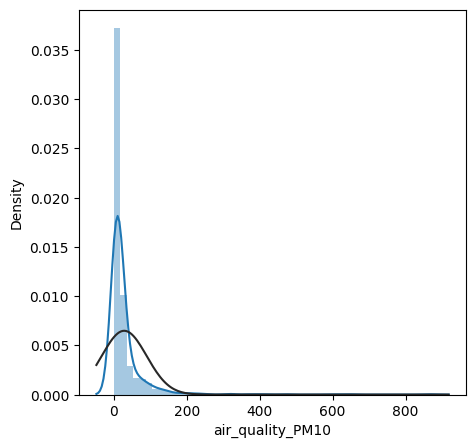

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3816\2250737215.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],fit = norm)


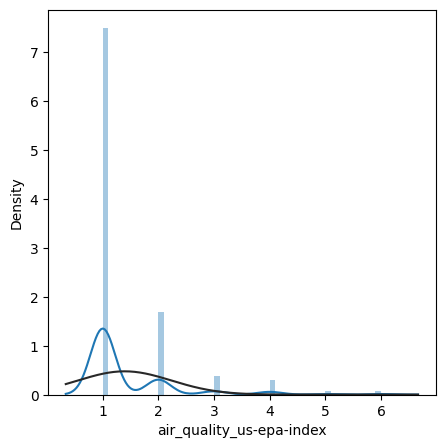

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3816\2250737215.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],fit = norm)


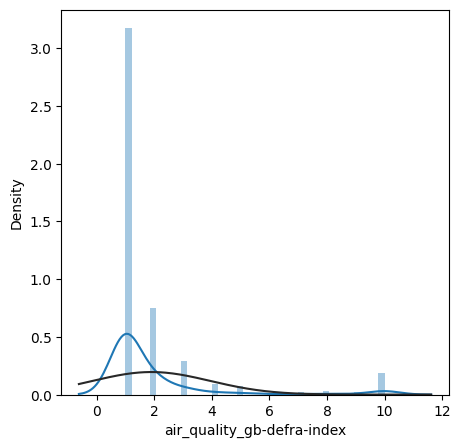

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3816\2250737215.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],fit = norm)


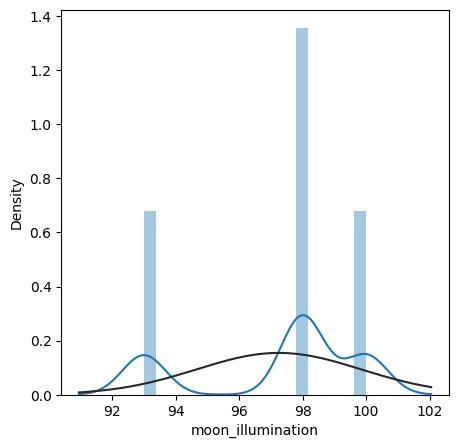

In [16]:
#CHECKING THE DISTRIBUTION PLOT OF THE NUMERICAL FEATURES

for i,var in enumerate(num_var):
    plt.figure(figsize=(5,5))
    sns.distplot(df[var],fit = norm)
    plt.show()

MAJORITY OF THE DISTRIBUTION ARE GAUSSIAN DISTRIBUTED..

AS IN THE REAL WORLD, THE MODEL EXPECTS TO GET THE OUTLING INPUTS...HENCE, DECIDED NOT TO HANDLE THEM..

# GAUGE CHART

In [17]:
#GETTING THE GAUGE CHART

gauge_chart = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = df['temperature_celsius'].iloc[0],
    mode = "gauge+number",
    title = {'text': 'Temperature (Celsius)'},
    gauge = {'axis': {'range': [None, 40]},
             'bar': {'color': "darkblue"},
             'steps' : [
                 {'range': [0, 10], 'color': "lightgray"},
                 {'range': [10, 20], 'color': "gray"}],
             }))
gauge_chart.show()

# AVERAGE TEMPERATURE BY COUNTRY

In [18]:
plt.figure(figsize=(25,25))
bar_chart = px.bar(df, x='country', y='temperature_celsius', title='Average Temperature by Country')
bar_chart.show()

<Figure size 2500x2500 with 0 Axes>

# TEMPERATURE VS HUMIDITY

In [19]:
plt.figure(figsize=(50,50))
scatter_plot = px.scatter(df, x='temperature_celsius', y='humidity', color='country', title='Temperature vs Humidity')
scatter_plot.show()

<Figure size 5000x5000 with 0 Axes>

# TEMPERATURE DISTRIBUTION

In [20]:
histogram = px.histogram(df, x='temperature_celsius', nbins=20, title='Temperature Distribution')
histogram.show()

# USING 3D SCATTER PLOT

In [21]:
plt.figure(figsize=(50,50))
scatter_3d = px.scatter_3d(df, x='temperature_celsius', y='humidity', z='wind_mph', color='country', title='3D Scatter Plot')
scatter_3d.show()

<Figure size 5000x5000 with 0 Axes>

# Wind Speed by Direction

In [22]:
polar_scatter = px.scatter_polar(df, r='wind_mph', theta='wind_direction', color='country', title='Wind Speed by Direction')
polar_scatter.show()

# CALENDER HEATMAP

In [23]:
plt.figure(figsize=(50,50))
calendar_heatmap = px.density_heatmap(df, x='last_updated', y='location_name', z='temperature_celsius', title='Calendar Heatmap')
calendar_heatmap.show()

<Figure size 5000x5000 with 0 Axes>

# Temperature by Wind Direction (Polar Bar)

In [24]:
polar_bar = px.bar_polar(df, r='temperature_celsius', theta='wind_direction', color='country', title='Temperature by Wind Direction (Polar Bar)')
polar_bar.show()

# ENCODING THE CATEGORICAL FEATURES

In [25]:
#GETTING THE CATEGORICAL FEAUTURES

cat_var = df.select_dtypes(include=["O"]).columns

print("All the categorical features in the dataset : ",cat_var)

All the categorical features in the dataset :  Index(['country', 'location_name', 'timezone', 'last_updated',
       'condition_text', 'wind_direction', 'sunrise', 'sunset', 'moonrise',
       'moonset', 'moon_phase'],
      dtype='object')


In [26]:
df.head()

country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1693301400  2023-08-29 14:00                 28.8   
1          1693301400  2023-08-29 11:30                 27.0   
2          1693301400  2023-08-29 10:30                 28.0   
3          1693301400  2023-08-29 11:30                 10.2   
4          1693301400  2023-08-29 10:30                 25.0   

   temperature_fahrenheit condition_text  wind_mph  wind_kph  wind_degree  \
0                    83.8          Sunny       7.2      11.5           74   
1                    80.6  Partly cloudy       3.8       6.1          210   
2                    82.4  Partly cloudy       8.1      13.0          240   
3                    50.4          Sunny       6.0       9.7          345   
4                    77.0  Partly cloudy       2.2       3.6          270   

  wind_direction  pressure_mb  pressure_in  precip_mm  precip_in  humidity  \
0            ENE       1004.0        29.64        0.0        0.0        19   
1            SSW       1006.0        29.71        0.0        0.0        54   
2            WSW       1014.0        29.94        0.0        0.0        30   
3            NNW       1015.0        29.97        0.0        0.0        51   
4              W       1016.0        30.00        0.0        0.0        69   

   cloud  feels_like_celsius  feels_like_fahrenheit  visibility_km  \
0      0                26.7                   80.1           10.0   
1     75                28.0                   82.3           10.0   
2     25                27.4                   81.3           10.0   
3      6                 8.9                   48.0           10.0   
4     75                26.9                   80.4           10.0   

   visibility_miles  uv_index  gust_mph  gust_kph  \
0               6.0       7.0       8.3      13.3   
1               6.0       6.0       7.4      11.9   
2               6.0       7.0       3.4       5.4   
3               6.0       4.0       7.4      11.9   
4               6.0       6.0       3.6       5.8   

   air_quality_Carbon_Monoxide  air_quality_Ozone  \
0                        647.5              130.2   
1                        433.9              104.4   
2                        647.5               16.6   
3                        190.3               68.0   
4                       2136.2              147.3   

   air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  \
0                           1.2                          0.4   
1                           3.6                          1.8   
2                          63.1                         12.6   
3                           0.2                          0.2   
4                          52.8                         26.9   

   air_quality_PM2.5  air_quality_PM10  air_quality_us-epa-index  \
0                7.9              11.1                         1   
1               28.2              29.6                         2   
2                6.4               7.9                         1   
3                0.5               0.8                         1   
4              139.6             203.3                         4   

   air_quality_gb-defra-index   sunrise    sunset  moonrise   moonset  \
0                           1  05:24 AM  06:24 PM  05:39 PM  02:48 AM   
1                           3  06:04 AM  07:19 PM  06:50 PM  03:25 AM   
2                           1  06:16 AM  07:21 PM  06:46 PM  03:50 AM   
3                           1  07:16 AM  08:34 PM  08:08 PM  04:38 AM   
4                          10  06

In [27]:
#ORDINAL ENCODING

ordinal_label_country = {k: i for i, k in enumerate(df["country"].unique(),0)}
ordinal_label_location_name = {k: i for i, k in enumerate(df["location_name"].unique(),0)}
ordinal_label_timezone = {k: i for i, k in enumerate(df["timezone"].unique(),0)}
ordinal_label_last_updated = {k: i for i, k in enumerate(df["last_updated"].unique(),0)}
ordinal_label_condition_text = {k: i for i, k in enumerate(df["condition_text"].unique(),0)}
ordinal_label_wind_direction = {k: i for i, k in enumerate(df["wind_direction"].unique(),0)}
ordinal_label_sunrise = {k: i for i, k in enumerate(df["sunrise"].unique(),0)}
ordinal_label_sunset = {k: i for i, k in enumerate(df["sunset"].unique(),0)}
ordinal_label_moonrise = {k: i for i, k in enumerate(df["moonrise"].unique(),0)}
ordinal_label_moonset = {k: i for i, k in enumerate(df["moonset"].unique(),0)}
ordinal_label_moon_phase = {k: i for i, k in enumerate(df["moon_phase"].unique(),0)}

In [28]:
#MAPPING FOR ORDINAL ENCODING

df["country"] = df["country"].map(ordinal_label_country)
df["location_name"] = df["location_name"].map(ordinal_label_location_name)
df["timezone"] = df["timezone"].map(ordinal_label_timezone)
df["last_updated"] = df["last_updated"].map(ordinal_label_last_updated)
df["condition_text"] = df["condition_text"].map(ordinal_label_condition_text)
df["wind_direction"] = df["wind_direction"].map(ordinal_label_wind_direction)
df["sunrise"] = df["sunrise"].map(ordinal_label_sunrise)
df["sunset"] = df["sunset"].map(ordinal_label_sunset)
df["moonrise"] = df["moonrise"].map(ordinal_label_moonrise)
df["moonset"] = df["moonset"].map(ordinal_label_moonset)
df["moon_phase"] = df["moon_phase"].map(ordinal_label_moon_phase)

In [29]:
#CHECKING THE ENCODING

df.head()

country  location_name  latitude  longitude  timezone  last_updated_epoch  \
0        0              0     34.52      69.18         0          1693301400   
1        1              1     41.33      19.82         1          1693301400   
2        2              2     36.76       3.05         2          1693301400   
3        3              3     42.50       1.52         3          1693301400   
4        4              4     -8.84      13.23         4          1693301400   

   last_updated  temperature_celsius  temperature_fahrenheit  condition_text  \
0             0                 28.8                    83.8               0   
1             1                 27.0                    80.6               1   
2             2                 28.0                    82.4               1   
3             1                 10.2                    50.4               0   
4             2                 25.0                    77.0               1   

   wind_mph  wind_kph  wind_degree  wind_direction  pressure_mb  pressure_in  \
0       7.2      11.5           74               0       1004.0        29.64   
1       3.8       6.1          210               1       1006.0        29.71   
2       8.1      13.0          240               2       1014.0        29.94   
3       6.0       9.7          345               3       1015.0        29.97   
4       2.2       3.6          270               4       1016.0        30.00   

   precip_mm  precip_in  humidity  cloud  feels_like_celsius  \
0        0.0        0.0        19      0                26.7   
1        0.0        0.0        54     75                28.0   
2        0.0        0.0        30     25                27.4   
3        0.0        0.0        51      6                 8.9   
4        0.0        0.0        69     75                26.9   

   feels_like_fahrenheit  visibility_km  visibility_miles  uv_index  gust_mph  \
0                   80.1           10.0               6.0       7.0       8.3   
1                   82.3           10.0               6.0       6.0       7.4   
2                   81.3           10.0               6.0       7.0       3.4   
3                   48.0           10.0               6.0       4.0       7.4   
4                   80.4           10.0               6.0       6.0       3.6   

   gust_kph  air_quality_Carbon_Monoxide  air_quality_Ozone  \
0      13.3                        647.5              130.2   
1      11.9                        433.9              104.4   
2       5.4                        647.5               16.6   
3      11.9                        190.3               68.0   
4       5.8                       2136.2              147.3   

   air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  \
0                           1.2                          0.4   
1                           3.6                          1.8   
2                          63.1                         12.6   
3                           0.2                          0.2   
4                          52.8                         26.9   

   air_quality_PM2.5  air_quality_PM10  air_quality_us-epa-index  \
0                7.9              11.1                         1   
1               28.2              29.6                         2   
2                6.4               7.9                         1   
3                0.5               0.8                         1   
4              139.6             203.3                         4   

   air_quality_gb-defra-index  sunrise  sunset  moonrise  moonset  moon_phase  \
0                           1        0       0         0        0           0   
1                           3        1       1         1        1           0   
2                           1        2       2         2        2           0   
3                           1        3       3         3        3           0   
4                          10        4       4         4        4           0   

   moon_illumination  
0    

ALL THE CATEGORICAL FEATURES ARE ENCODED SUCCESSFULLY

# SPLITTING THE DATASET

In [30]:
# GETTING THE DEPENDENT AND INDPENDENT VARIABLES

X = df.drop(columns = "condition_text")
y = df["condition_text"]

In [31]:
#NOW, SPLITTING THE DATA INTO X TRAIN AND TEST AND Y TRAIN AND TEST

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=52)

print("The Shape of the Training data = ",X_train.shape)
print("The Shape of the Training dependent data = ",y_train.shape)
print("The Shape of the test data = ",X_test.shape)
print("The Shape of the test pred data = ",y_test.shape)

The Shape of the Training data =  (624, 40)
The Shape of the Training dependent data =  (624,)
The Shape of the test data =  (156, 40)
The Shape of the test pred data =  (156,)


THE DATA HAVE BEEN SPLITTED INTO TRAIN AND TEST DATASET

# FEATURE SELECTION

In [32]:
#CHECKING THE CORRELATION

X_train.corr()

country  location_name  latitude  longitude  \
country                       1.000000       0.954808 -0.015335   0.085992   
location_name                 0.954808       1.000000 -0.016589   0.095350   
latitude                     -0.015335      -0.016589  1.000000  -0.004761   
longitude                     0.085992       0.095350 -0.004761   1.000000   
timezone                      0.965420       0.940730  0.002975   0.077929   
last_updated_epoch            0.027706       0.021712 -0.022533   0.001194   
last_updated                  0.099958       0.097260 -0.052990   0.047916   
temperature_celsius           0.051445       0.049271 -0.078209   0.061167   
temperature_fahrenheit        0.051502       0.049308 -0.078207   0.061188   
wind_mph                      0.119599       0.101718 -0.114214   0.015249   
wind_kph                      0.120160       0.102343 -0.114505   0.015150   
wind_degree                  -0.072731      -0.061534  0.133154   0.043428   
wind_direction                0.021991       0.024374 -0.075270   0.007022   
pressure_mb                   0.017478       0.012417 -0.506002  -0.151541   
pressure_in                   0.018189       0.012685 -0.505184  -0.147707   
precip_mm                     0.045228       0.037229 -0.035748   0.023680   
precip_in                     0.045756       0.037449 -0.035737   0.024854   
humidity                     -0.018590      -0.051279  0.090835  -0.103238   
cloud                         0.018871      -0.004898  0.020967  -0.018044   
feels_like_celsius            0.052288       0.040694 -0.106660   0.028234   
feels_like_fahrenheit         0.052137       0.040550 -0.106870   0.028396   
visibility_km                 0.010331       0.012818  0.003233   0.006661   
visibility_miles              0.010117       0.014745  0.000837   0.008317   
uv_index                      0.029165       0.035601  0.022598   0.298124   
gust_mph                      0.135777       0.117487 -0.154197   0.003603   
gust_kph                      0.135752       0.117545 -0.154036   0.003891   
air_quality_Carbon_Monoxide  -0.072537      -0.076077 -0.171443   0.018624   
air_quality_Ozone             0.047912       0.054910  0.163048   0.125903   
air_quality_Nitrogen_dioxide -0.014348      -0.010455  0.060563   0.064906   
air_quality_Sulphur_dioxide   0.022379       0.021174  0.045314   0.055344   
air_quality_PM2.5            -0.062920      -0.066326 -0.118006   0.056242   
air_quality_PM10             -0.028075      -0.035420 -0.112469   0.077040   
air_quality_us-epa-index     -0.030235      -0.026469 -0.106044   0.129960   
air_quality_gb-defra-index    0.011513       0.005596 -0.089182   0.140381   
sunrise                       0.174904       0.174006  0.052182   0.020885   
sunset                        0.215219       0.225495  0.285956  -0.017946   
moonrise                      0.125650       0.122664  0.102140   0.023364   
moonset                       0.183798       0.187466 -0.140295  -0.070113   
moon_phase                    0.016589       0.010235 -0.024703  -0.010662   
moon_illumination             0.013575       0.009317 -0.028608  -0.012633   

                              timezone  last_updated_epoch  last_updated  \
country                       0.965420            0.027706      0.099958   
location_name                 0.940730            0.021712      0.097260   
latitude                      0.002975           -0.022533     -0.052990   
longitude                     0.077929            0.001194      0.047916   
timezone                      1.000000            0.029578      0.101807   
last_updated_epoch            0.029578            1.000000      0.965258   
last_updated                  0.101807            0.965258      1.000000   
temperature_celsius           0.060596           -0.122965     -0.080112   
temperature_fahrenheit        0.060635           -0.122888     -0.080033   
wind_mph                      0.131008           -0.159171     -0.133196

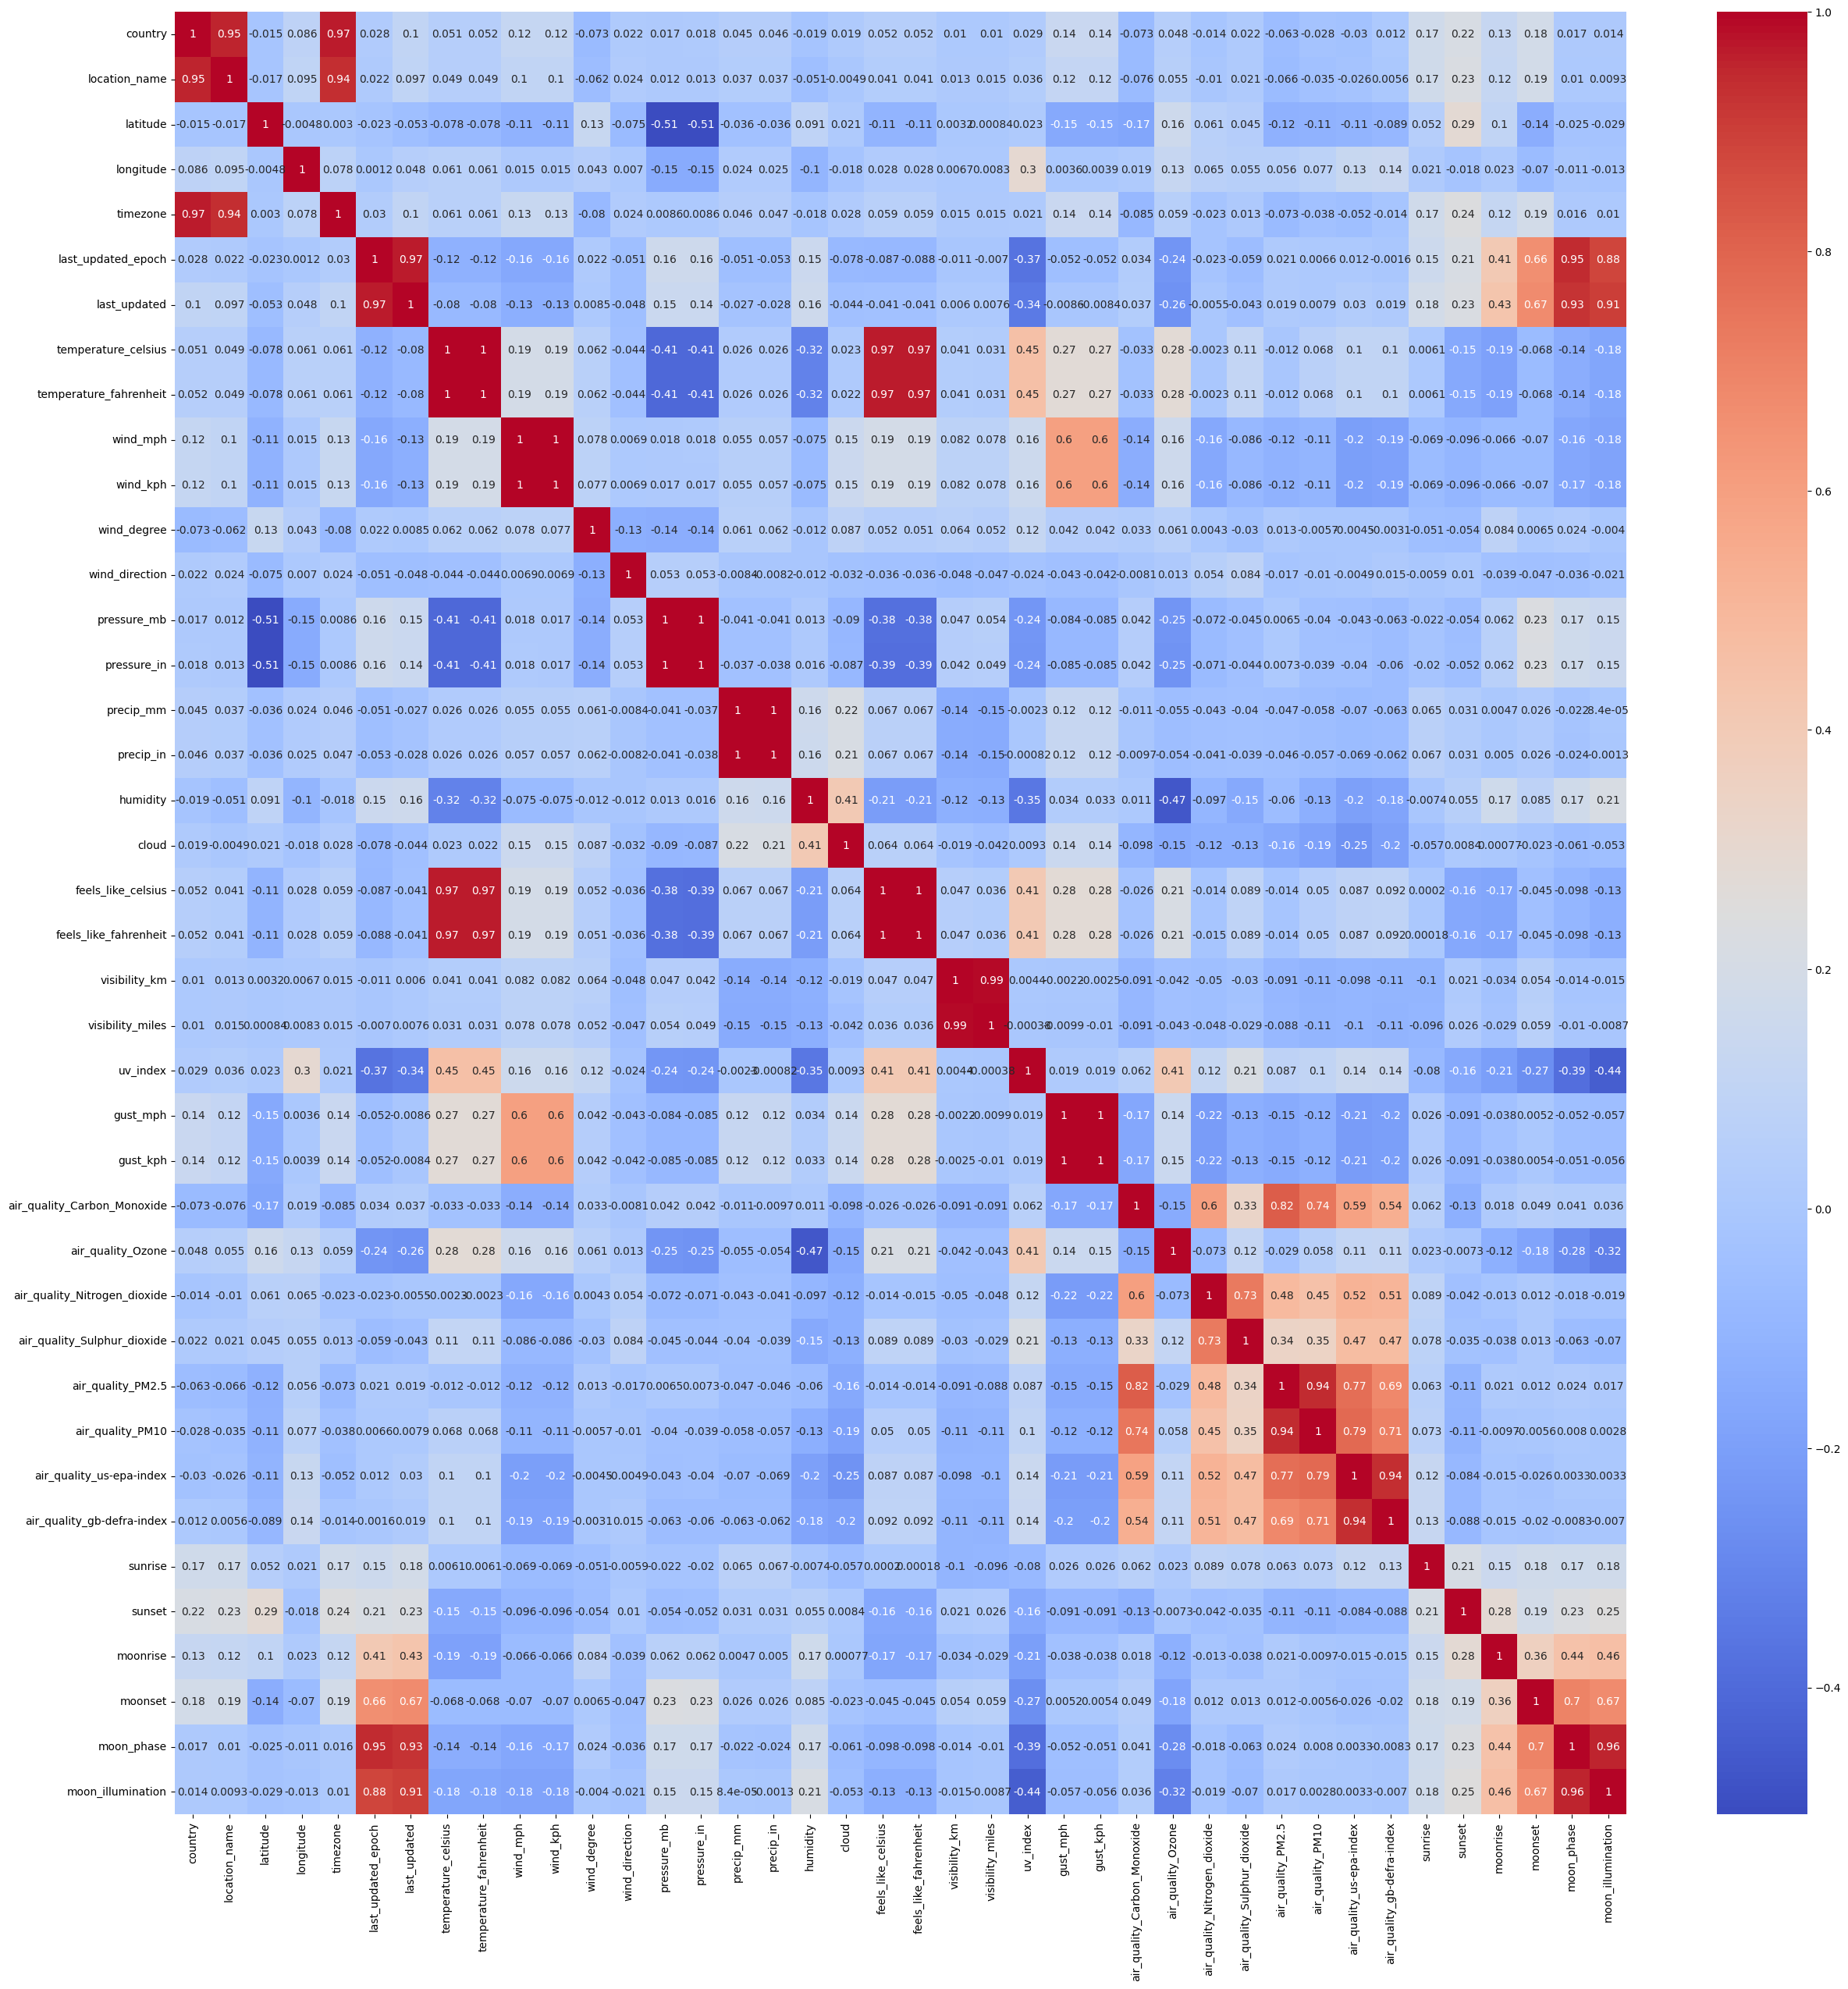

In [33]:
#Using Pearson Correlation

plt.figure(figsize=(30,30))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap="coolwarm")
plt.show()

CORRELATION BETWEEN ALL THE INDEPENDENT FEATURES..

In [34]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [35]:
#CHECKING THE LENGTH OF UNWANTED FEATURES

corr_features = correlation(X_train, 0.7)
len(set(corr_features))

18

In [36]:
#CHECKING THE UNWANTED FEATURES

corr_features

{'air_quality_PM10',
 'air_quality_PM2.5',
 'air_quality_Sulphur_dioxide',
 'air_quality_gb-defra-index',
 'air_quality_us-epa-index',
 'feels_like_celsius',
 'feels_like_fahrenheit',
 'gust_kph',
 'last_updated',
 'location_name',
 'moon_illumination',
 'moon_phase',
 'precip_in',
 'pressure_in',
 'temperature_fahrenheit',
 'timezone',
 'visibility_miles',
 'wind_kph'}

In [37]:
#FEATURE SELECTION USING MUTUAL INFORMATION GAIN

mutual_info = mutual_info_classif(X_train,y_train)

In [38]:
#GETTING ALL THE IMPORTANT FEATURES 

mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

cloud                           0.898214
uv_index                        0.326006
latitude                        0.283503
visibility_miles                0.260559
precip_mm                       0.260325
air_quality_us-epa-index        0.248358
longitude                       0.230769
timezone                        0.217849
moon_phase                      0.214365
location_name                   0.212402
humidity                        0.195353
last_updated                    0.193981
country                         0.176440
temperature_celsius             0.176006
temperature_fahrenheit          0.174436
visibility_km                   0.161598
precip_in                       0.159613
sunrise                         0.156616
last_updated_epoch              0.142448
feels_like_fahrenheit           0.125008
pressure_mb                     0.123454
feels_like_celsius              0.116606
sunset                          0.112422
air_quality_Ozone               0.108025
pressure_in     

In [39]:
#GETTING TOP 23 IMPORTANT FEATURES

sel_23_col = SelectKBest(mutual_info_classif, k =23)
sel_23_col.fit(X_train,y_train)
X_train.columns[sel_23_col.get_support()]

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'precip_mm', 'precip_in', 'humidity', 'cloud',
       'feels_like_celsius', 'feels_like_fahrenheit', 'visibility_km',
       'visibility_miles', 'uv_index', 'air_quality_us-epa-index',
       'air_quality_gb-defra-index', 'sunrise', 'moon_phase',
       'moon_illumination'],
      dtype='object')

In [40]:
# DROPPING THE UNWANTED COLUMNS

X_train_sel = X_train.drop(corr_features, axis=1)
X_test_sel = X_test.drop(corr_features, axis=1)

IMPORTANT FEATURES HAVE BEEN SELECTED SUCCESSFULLY

# FEATURE SCALING

In [41]:
#FEATURE SELECTION

sc = StandardScaler()
sc.fit(X_train_sel)

X_train_sc = sc.transform(X_train_sel)
X_test_sc = sc.transform(X_test_sel)

In [42]:
#CONVERTING THE ARRAY INTO DATAFRAME
'''
X_train_sc = pd.DataFrame(X_train_sel,columns = ['Total ESG Risk score', 'Social Risk Score', 'Sector', 'Industry', 'Governance Risk Score',
       'Full Time Emp"loyees', 'Environment Risk Score', 'ESG Risk Percentile', 'ESG Risk Level'])
X_test_sc = pd.DataFrame(X_test_sel,columns = ['Total ESG Risk score', 'Social Risk Score', 'Sector', 'Industry', 'Governance Risk Score',
       'Full Time Employees', 'Environment Risk Score', 'ESG Risk Percentile', 'ESG Risk Level'])
'''

'\nX_train_sc = pd.DataFrame(X_train_sel,columns = [\'Total ESG Risk score\', \'Social Risk Score\', \'Sector\', \'Industry\', \'Governance Risk Score\',\n       \'Full Time Emp"loyees\', \'Environment Risk Score\', \'ESG Risk Percentile\', \'ESG Risk Level\'])\nX_test_sc = pd.DataFrame(X_test_sel,columns = [\'Total ESG Risk score\', \'Social Risk Score\', \'Sector\', \'Industry\', \'Governance Risk Score\',\n       \'Full Time Employees\', \'Environment Risk Score\', \'ESG Risk Percentile\', \'ESG Risk Level\'])\n'

THE DATA HAVE BEEN STANDARISED...

# TRAINING THE MODEL

In [43]:
#TRAINING THE MODEL USING SUPPORT VECTOR MACHINE
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

svm = SVC(kernel = "linear")
svm.fit(X_train_sc,y_train)
svm.score(X_test_sc,y_test)

0.782051282051282

In [44]:

svm_c = cross_val_score(svm,X_train_sc,y_train,cv=10)
svm_c.mean()

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=10.



0.7738863287250384

In [45]:
y_pred_svm = svm.predict(X_test_sc)
y_pred_svm

array([ 4,  3,  1,  1,  8,  3,  0,  1,  1,  3,  1,  3,  3,  1,  8,  1,  6,
        3,  3,  3,  0,  3,  3,  3,  0,  1,  3,  1,  1,  1,  1,  1,  1,  3,
        0,  1,  1,  4,  7,  3,  8,  1,  1,  3,  1,  7,  3,  1,  1,  3,  3,
        1,  1,  8,  1,  1,  8,  1,  1,  1,  0,  3,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  3,  3,  1,  1,  1,  3,  1,  3,  7,  1,  3,  1,  3,
        0,  1,  0,  1,  1,  3,  1,  1,  1,  3,  1,  1,  1,  3,  1,  7,  1,
        1,  8,  3,  1,  0,  0,  1,  1,  1,  3,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  7,  1,  1,  0,  3,  3,  1,  3,  1,  1,  1,  1,  1,  1,  1,
        7,  1,  3,  1,  3,  3,  3,  1,  1, 18,  1,  1,  1,  1,  3,  1,  0,
        1,  0,  1], dtype=int64)

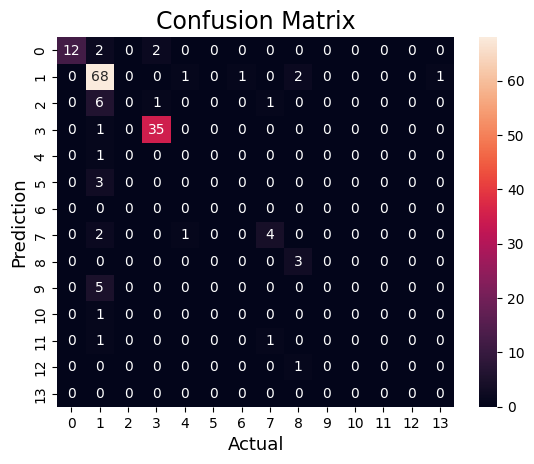

In [46]:
arr = confusion_matrix(y_test, y_pred_svm)
#Plot the confusion matrix.
sns.heatmap(arr,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [47]:
print("Accuracy: ({0:.4f})".format(metrics.accuracy_score(y_train,y_pred_svm)))
print()

ValueError: Found input variables with inconsistent numbers of samples: [624, 156]

In [ ]:
#TRAINING THE MODEL USING DECISION TREE

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini')
dt.fit(X_train_sel,y_train)
dt.score(X_test_sel,y_test)

In [ ]:

dt = cross_val_score(dt,X_train,y_train,cv=10)
dt.mean()

In [ ]:

'''
#TRAINING THE MODEL USING KNN

from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=20)
KNN.fit(X_train,y_train)
KNN.score(X_test,y_test)
'''

In [ ]:
'''
KNN = cross_val_score(KNN,X_train,y_train,cv=10)
KNN.mean()
'''

In [ ]:
'''
#TRAINING THE MODEL USING GaussianNB

from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB.fit(X_train,y_train)
GNB.score(X_test,y_test)
'''

In [ ]:
'''
GNB = cross_val_score(GNB,X_train,y_train,cv=10)
GNB.mean()
'''

In [ ]:
'''
#TRAINING THE MODEL USING MultinomialNB

from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()
BNB.fit(X_train,y_train)
BNB.score(X_test,y_test)
'''

In [ ]:
'''
BNB = cross_val_score(BNB,X_train,y_train,cv=10)
BNB.mean()
'''